In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

tried to use below, lsh_knn from sklearn but has error

In [1]:
import numpy as np
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
from sklearn.neighbors import LSHForest, KDTree
from sklearn.metrics import pairwise_distances

# Implement LSH KNN
def lsh_knn(X_train, y_train, X_test, K):
    lsh = LSHForest(n_estimators=10, n_candidates=50, n_neighbors=K)
    lsh.fit(X_train)
    distances, indices = lsh.kneighbors(X_test, n_neighbors=K)
    return indices, distances

# Implement KD-tree KNN
def kd_tree_knn(X_train, y_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# Implement Naive KNN
def naive_knn(X_train, y_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# Performance Evaluation Function
def evaluate_knn_variants():
    results = []
    dataset_sizes = [100, 500, 1000, 5000]
    dimensions = [2, 5, 10, 20]
    K = 5

    for N in dataset_sizes:
        for D in dimensions:
            X_train = np.random.rand(N, D)
            y_train = np.random.randint(0, 2, size=(N,))
            X_test = np.random.rand(10, D)

            for method in ['lsh', 'kd_tree', 'naive']:
                start_time = time.time()
                
                if method == 'lsh':
                    mem_usage = memory_usage((lsh_knn, (X_train, y_train, X_test, K)))
                elif method == 'kd_tree':
                    mem_usage = memory_usage((kd_tree_knn, (X_train, y_train, X_test, K)))
                elif method == 'naive':
                    mem_usage = memory_usage((naive_knn, (X_train, y_train, X_test, K)))
                
                elapsed_time = time.time() - start_time
                avg_mem = np.mean(mem_usage)
                
                results.append({
                    'method': method,
                    'dataset_size': N,
                    'dimensions': D,
                    'time': elapsed_time,
                    'memory': avg_mem
                })

    return results

# Visualization Function for Neighbors and Partitions
def visualize_knn(X_train, X_test, K):
    indices_lsh, _ = lsh_knn(X_train, y_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, y_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, y_train, X_test, K)

    plt.figure(figsize=(18, 6))

    # Plotting LSH Results
    plt.subplot(1, 3, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_lsh[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green')
    plt.title("LSH Approximate Neighbors")
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(1, 3, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green')
    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting Naive KNN Results
    plt.subplot(1, 3, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green')
    plt.title("Naive KNN Exact Neighbors")
    plt.legend()

    plt.show()

# Main Execution
if __name__ == "__main__":
    # Part 1: Run Performance Evaluation
    results = evaluate_knn_variants()
    for res in results:
        print(res)

    # Part 2: Visualization on 2D Data
    X_train = np.random.rand(200, 2)  # 2D dataset
    y_train = np.random.randint(0, 2, size=(200,))
    X_test = np.random.rand(5, 2)  # Test on 5 samples
    K = 5
    visualize_knn(X_train, X_test, K)


ImportError: cannot import name 'LSHForest' from 'sklearn.neighbors' (/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/__init__.py)

below has used ball tree approx knn, memory comparision in bar plot

         Method  Dataset Size  Dimensions  Train Time (s)  Test Time (s)  \
0   Approximate           100           2        0.001503       0.001438   
1       KD-Tree           100           2        0.000475       0.000281   
2         Naive           100           2        0.001004       0.000349   
3   Approximate           100           5        0.002881       0.000864   
4       KD-Tree           100           5        0.000335       0.000226   
5         Naive           100           5        0.000944       0.000375   
6   Approximate           100          10        0.002853       0.000892   
7       KD-Tree           100          10        0.000424       0.000245   
8         Naive           100          10        0.000978       0.000379   
9   Approximate           100          20        0.002757       0.000879   
10      KD-Tree           100          20        0.000421       0.000292   
11        Naive           100          20        0.000960       0.000442   
12  Approxim

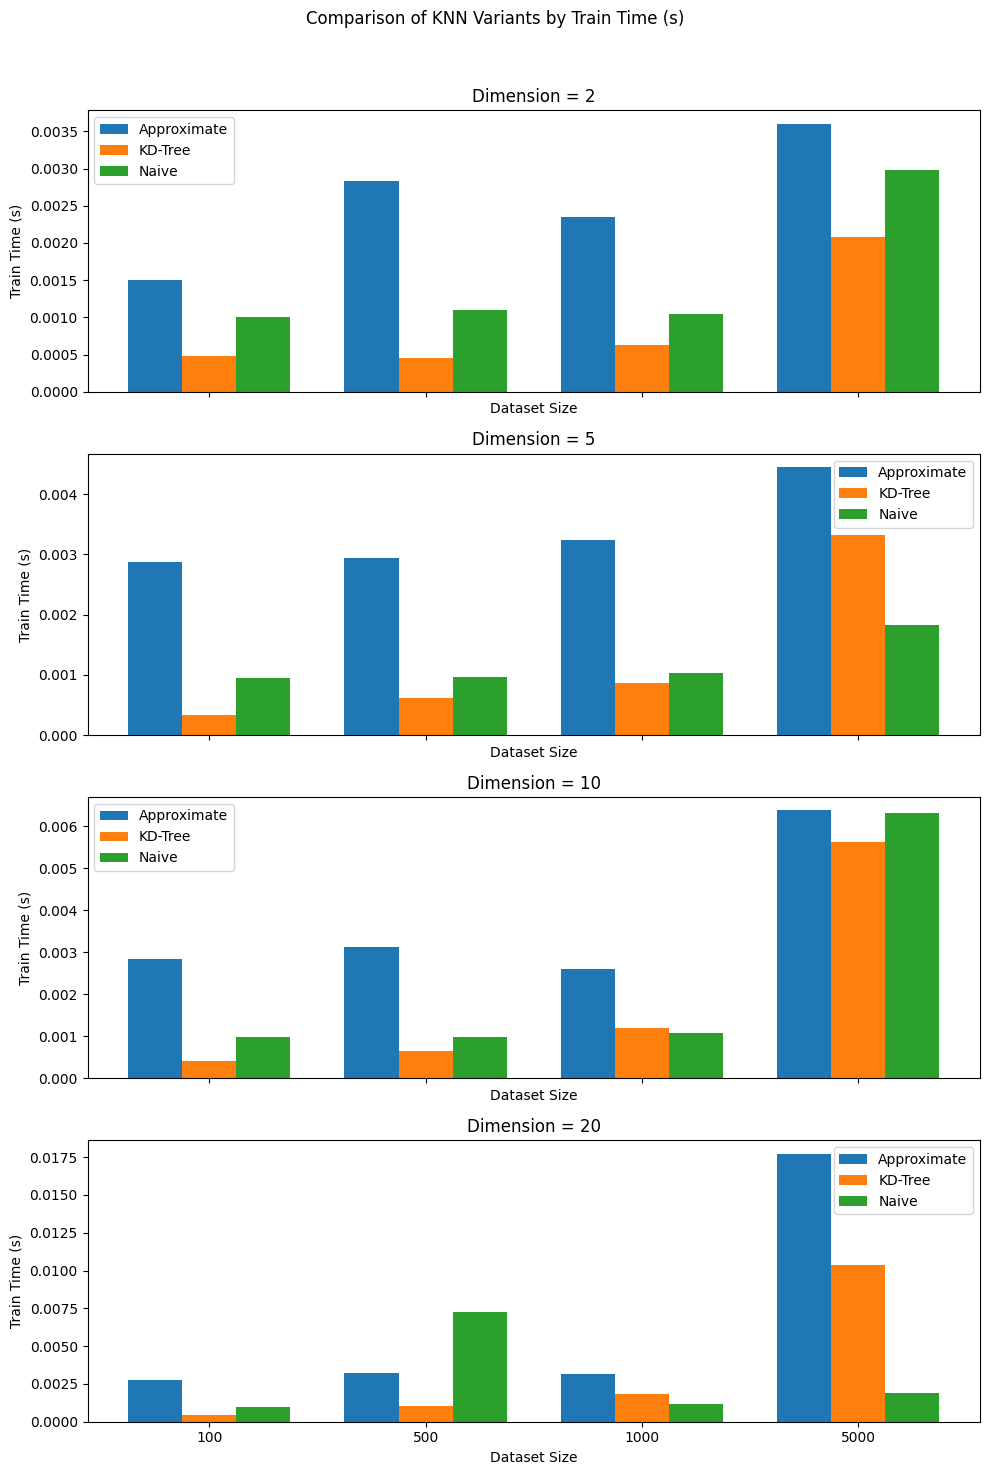

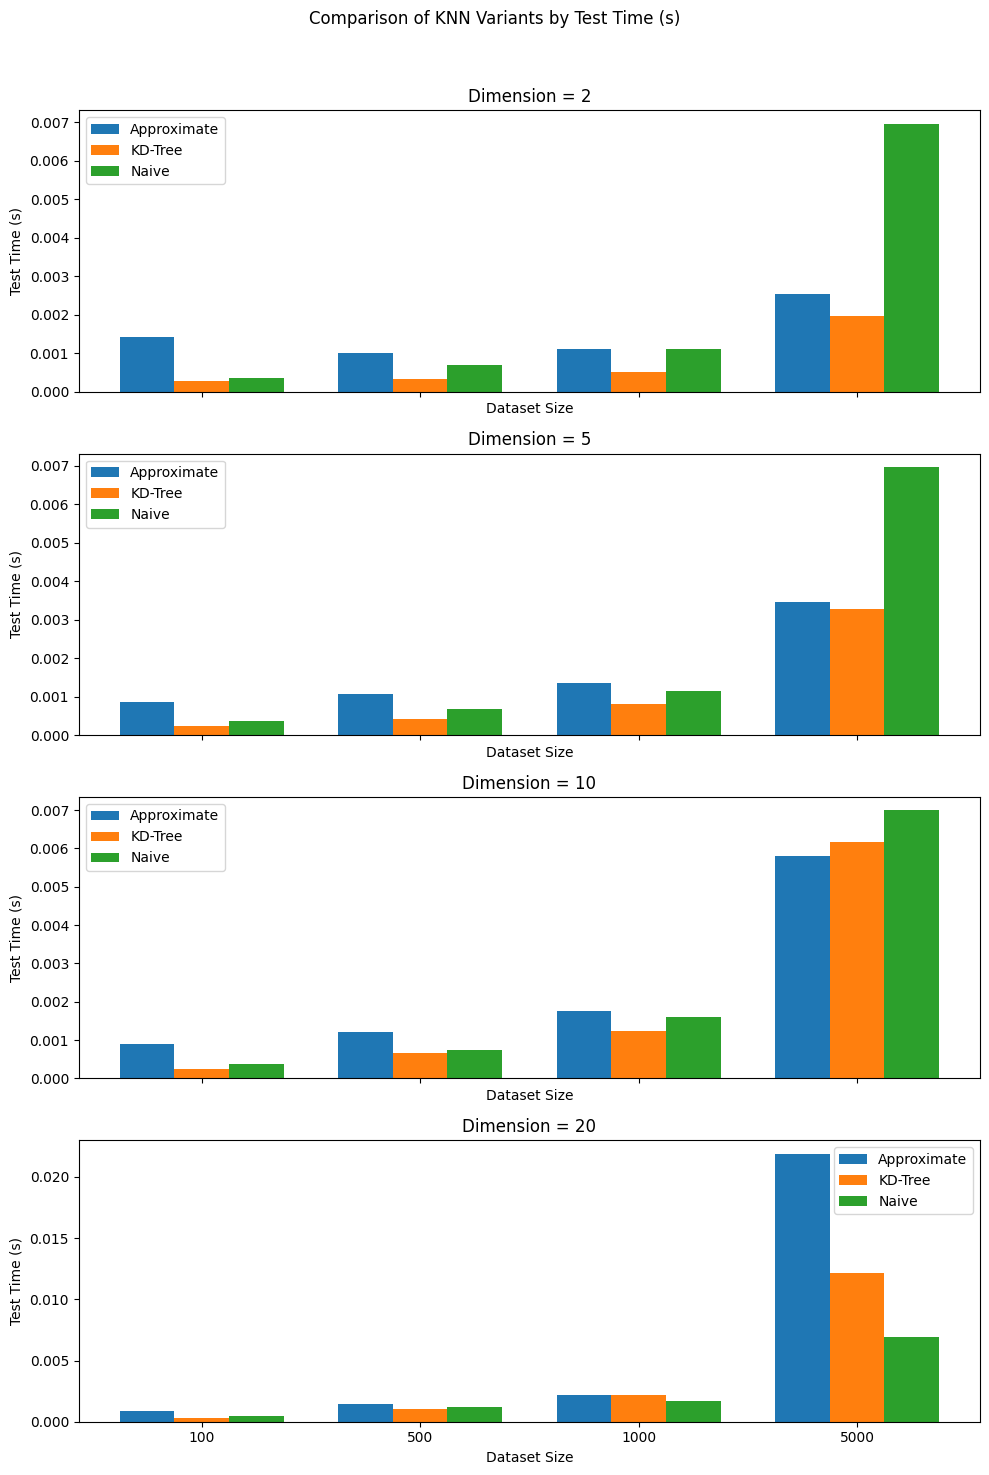

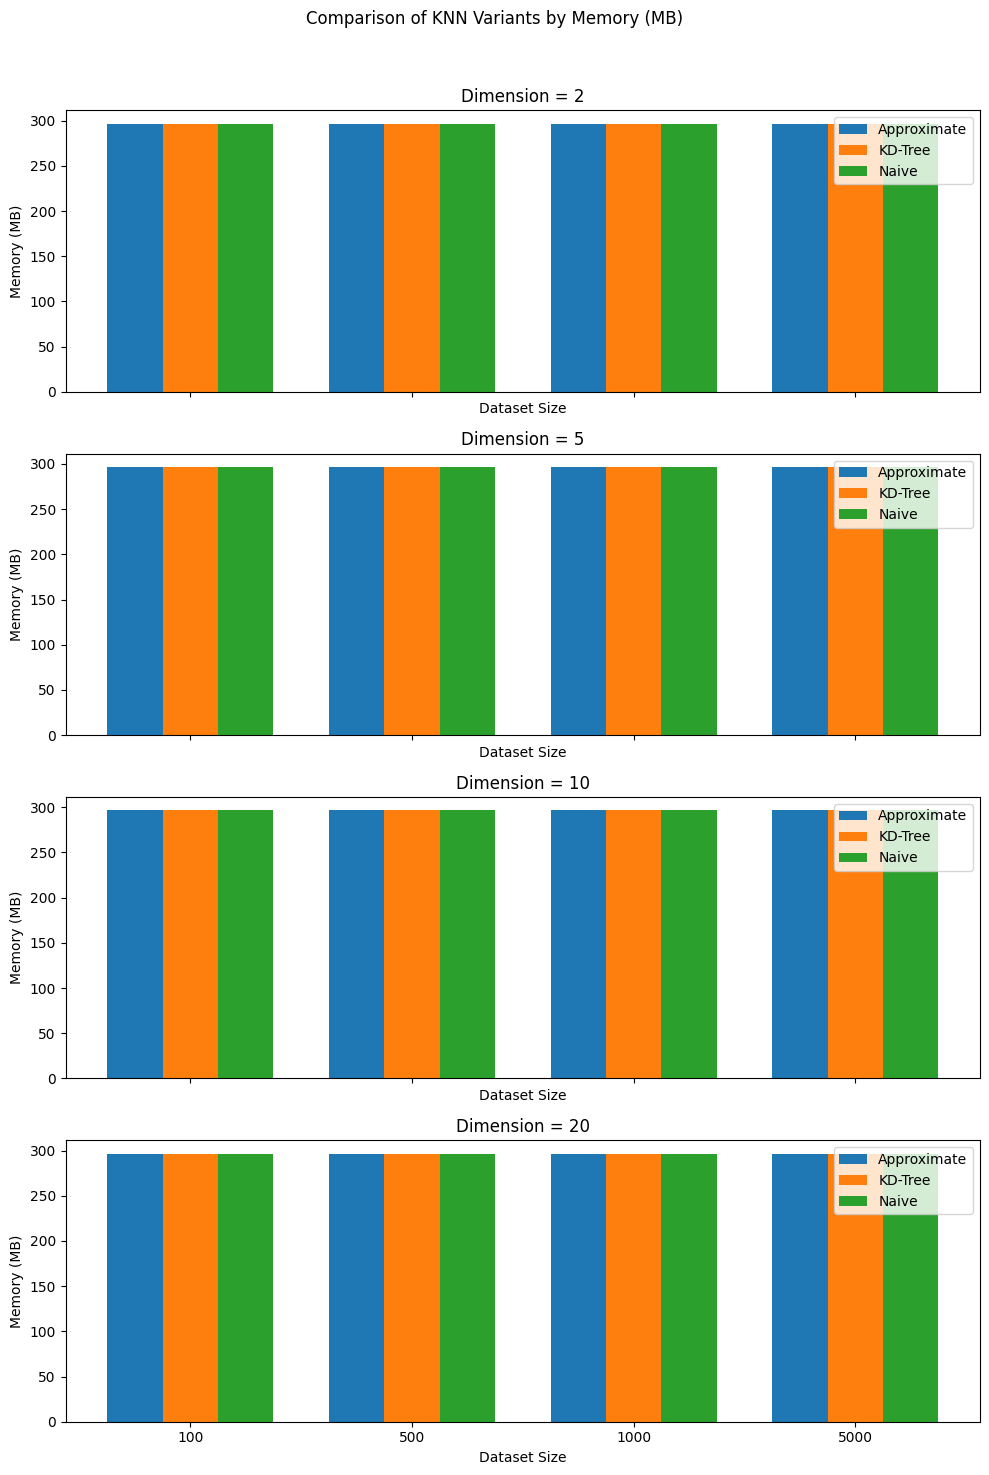

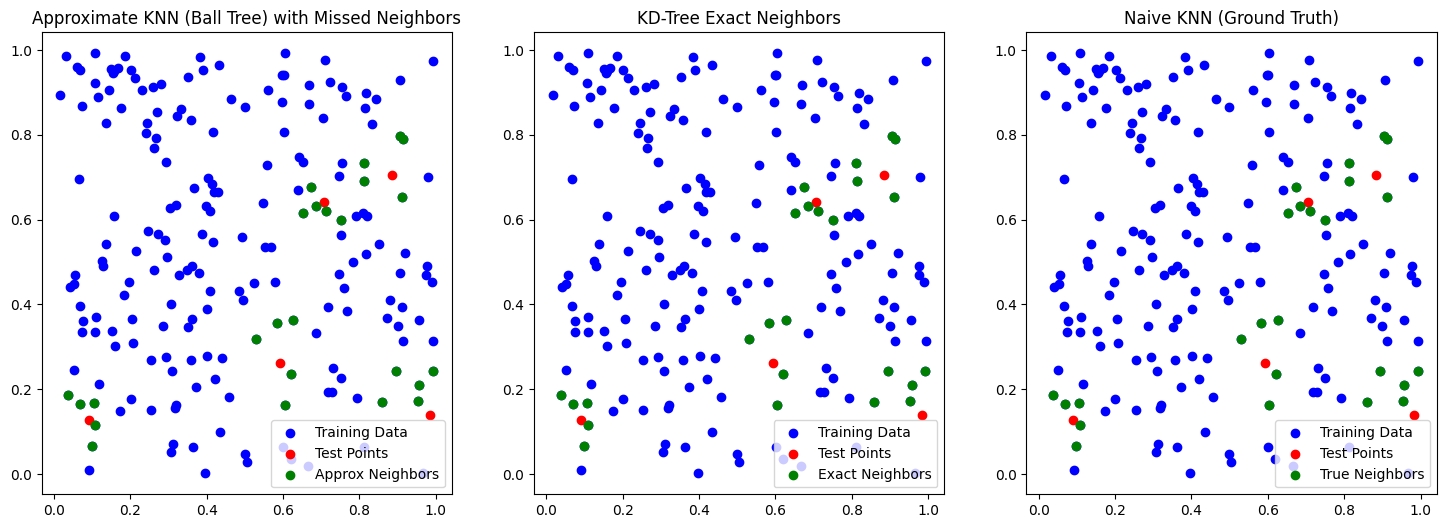

In [23]:
import numpy as np
import time
from memory_profiler import memory_usage
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances

# 1. Implement Approximate KNN using Ball Tree
def approximate_knn(X_train, X_test, K):
    nn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree')
    nn.fit(X_train)
    distances, indices = nn.kneighbors(X_test)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Performance Evaluation with Training and Testing Time
def evaluate_knn_variants():
    results = []
    dataset_sizes = [100, 500, 1000, 5000]
    dimensions = [2, 5, 10, 20]
    K = 5

    for N in dataset_sizes:
        for D in dimensions:
            X_train = np.random.rand(N, D)
            X_test = np.random.rand(10, D)

            for method, func in [('Approximate', approximate_knn),
                                 ('KD-Tree', kd_tree_knn),
                                 ('Naive', naive_knn)]:
                # Training time
                start_train = time.time()
                func(X_train, X_test[:1], K)  # fitting the model for training time estimation
                train_time = time.time() - start_train

                # Testing time (finding neighbors for test set)
                start_test = time.time()
                func(X_train, X_test, K)
                test_time = time.time() - start_test

                # Memory usage
                mem_usage = memory_usage((func, (X_train, X_test, K)))
                avg_mem = np.mean(mem_usage)
                
                results.append({
                    'Method': method,
                    'Dataset Size': N,
                    'Dimensions': D,
                    'Train Time (s)': train_time,
                    'Test Time (s)': test_time,
                    'Memory (MB)': avg_mem
                })

    return pd.DataFrame(results)

# 5. Plotting Function for Comparison
def plot_comparison(df):
    metrics = ['Train Time (s)', 'Test Time (s)']
    dataset_sizes = df['Dataset Size'].unique()
    dimensions = df['Dimensions'].unique()

    for metric in metrics:
        fig, ax = plt.subplots(len(dimensions), 1, figsize=(10, 15), sharex=True)
        fig.suptitle(f'Comparison of KNN Variants by {metric}')

        for idx, D in enumerate(dimensions):
            sub_df = df[df['Dimensions'] == D]
            bar_width = 0.25
            x = np.arange(len(dataset_sizes))

            for i, method in enumerate(['Approximate', 'KD-Tree', 'Naive']):
                values = sub_df[sub_df['Method'] == method][metric]
                ax[idx].bar(x + i * bar_width, values, width=bar_width, label=method)

            ax[idx].set_title(f'Dimension = {D}')
            ax[idx].set_xticks(x + bar_width)
            ax[idx].set_xticklabels(dataset_sizes)
            ax[idx].set_xlabel('Dataset Size')
            ax[idx].set_ylabel(metric)
            ax[idx].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
        plt.show()
        
# Plot memory results
def plot_memory_comparison(memory_results, dimensions, dataset_sizes):
    fig, axes = plt.subplots(len(dimensions), 1, figsize=(10, 15))
    fig.suptitle("Comparison of KNN Variants by Memory (MB)", fontsize=16)
    colors = ['blue', 'orange', 'green']
    
    for i, dim in enumerate(dimensions):
        ax = axes[i]
        ax.set_title(f"Dimension = {dim}")
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel("Memory (MB)")
        
        for j, method in enumerate(["approximate", "kd_tree", "naive"]):
            ax.plot(dataset_sizes, memory_results[dim][method], label=method.capitalize(), color=colors[j], marker='o')
            for k, value in enumerate(memory_results[dim][method]):
                ax.text(dataset_sizes[k], value, f"{value:.2f}", ha='center', va='bottom')
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
        

# 6. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K):
    indices_approx, _ = approximate_knn(X_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    plt.figure(figsize=(18, 6))

    # Plotting Approximate KNN Results with Missed Neighbors Highlighted
    plt.subplot(1, 3, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
    plt.title("Approximate KNN (Ball Tree) with Missed Neighbors")
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(1, 3, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting Naive KNN Results (Ground Truth)
    plt.subplot(1, 3, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()

# Main Execution
if __name__ == "__main__":
    # Part 1: Run Performance Evaluation and Display Results
    df_results = evaluate_knn_variants()
    print(df_results)

    # Part 2: Plot Comparison of Train Time, Test Time, and Memory Usage
    plot_comparison(df_results)

    # Part 3: Visualize Missed Neighbors and Partitions in 2D
    X_train = np.random.rand(200, 2)  # 2D dataset for visualization
    X_test = np.random.rand(5, 2)     # 2D test points
    K = 5
    visualize_knn_2d(X_train, X_test, K)
    



**below has used ball tree approx knn, memory comparision in line plot100 pts in dataset, for 2d partitioning**


         Method  Dataset Size  Dimensions  Train Time (s)  Test Time (s)  \
0   Approximate           100           2        0.001456       0.001046   
1       KD-Tree           100           2        0.000393       0.000200   
2         Naive           100           2        0.001275       0.000533   
3   Approximate           100           5        0.003029       0.000893   
4       KD-Tree           100           5        0.000349       0.000206   
5         Naive           100           5        0.000971       0.000376   
6   Approximate           100          10        0.003099       0.000919   
7       KD-Tree           100          10        0.000382       0.000230   
8         Naive           100          10        0.000905       0.000431   
9   Approximate           100          20        0.003007       0.000929   
10      KD-Tree           100          20        0.000402       0.000289   
11        Naive           100          20        0.000885       0.000399   
12  Approxim

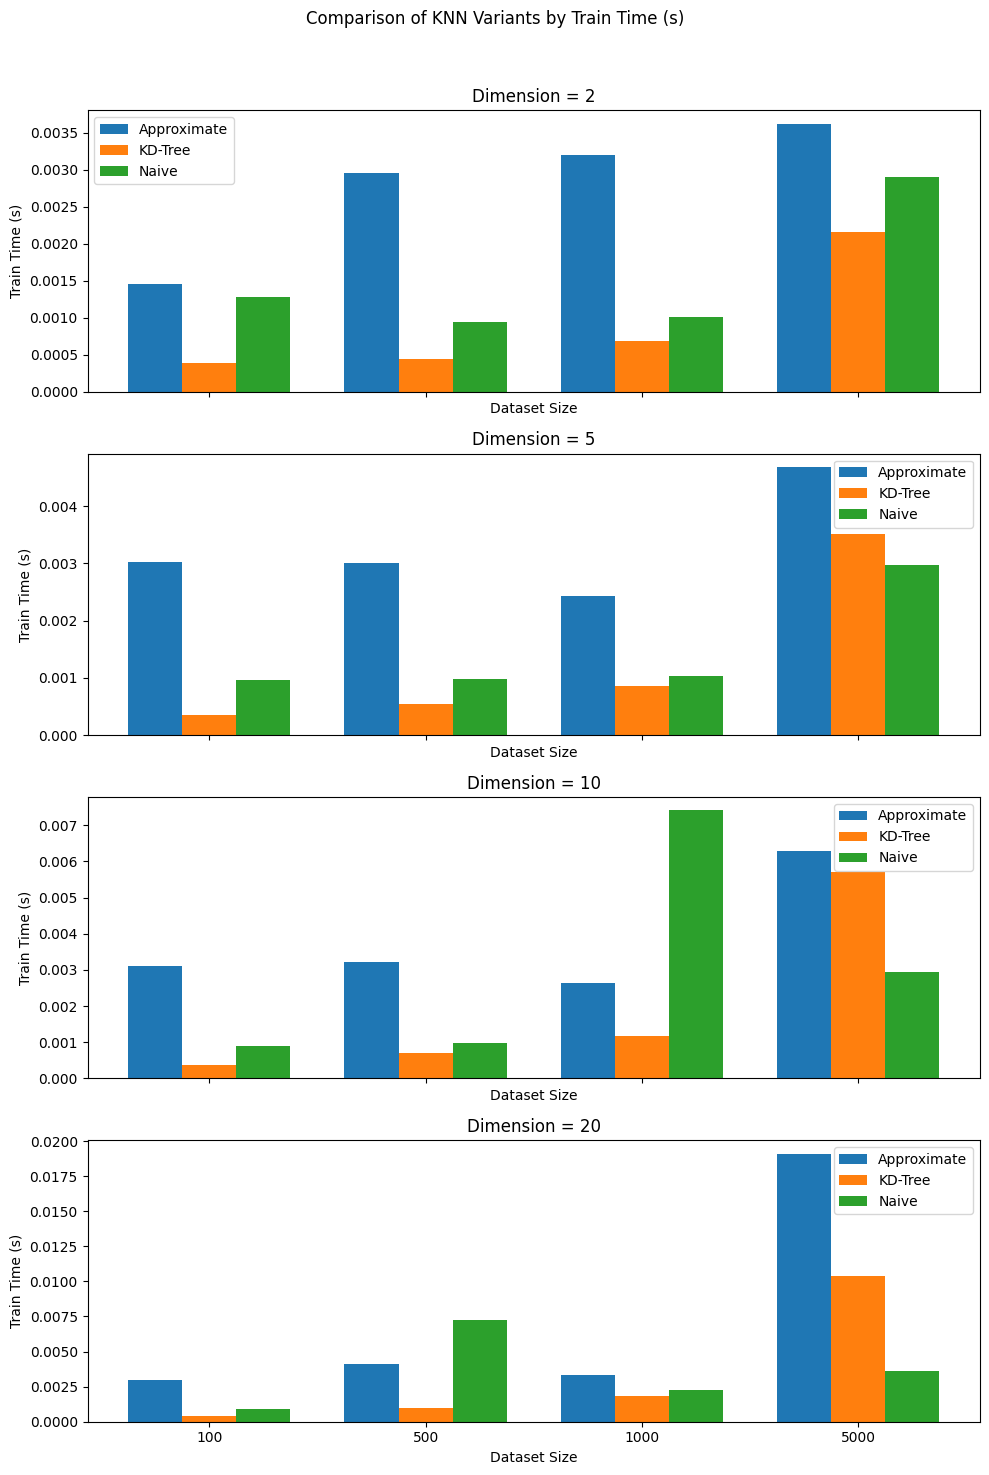

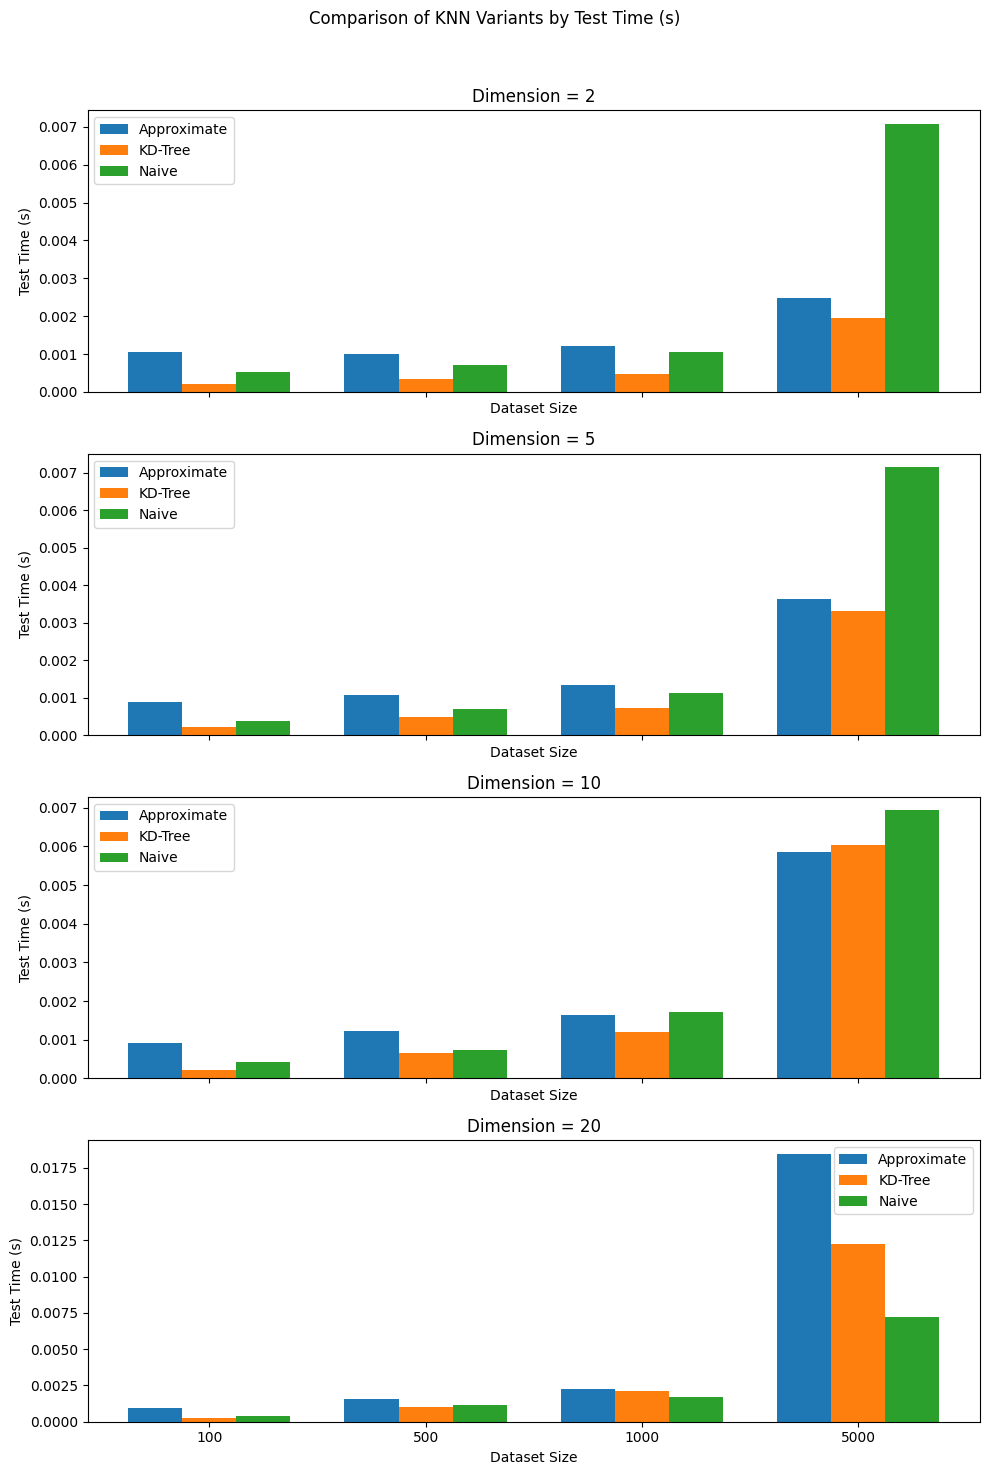

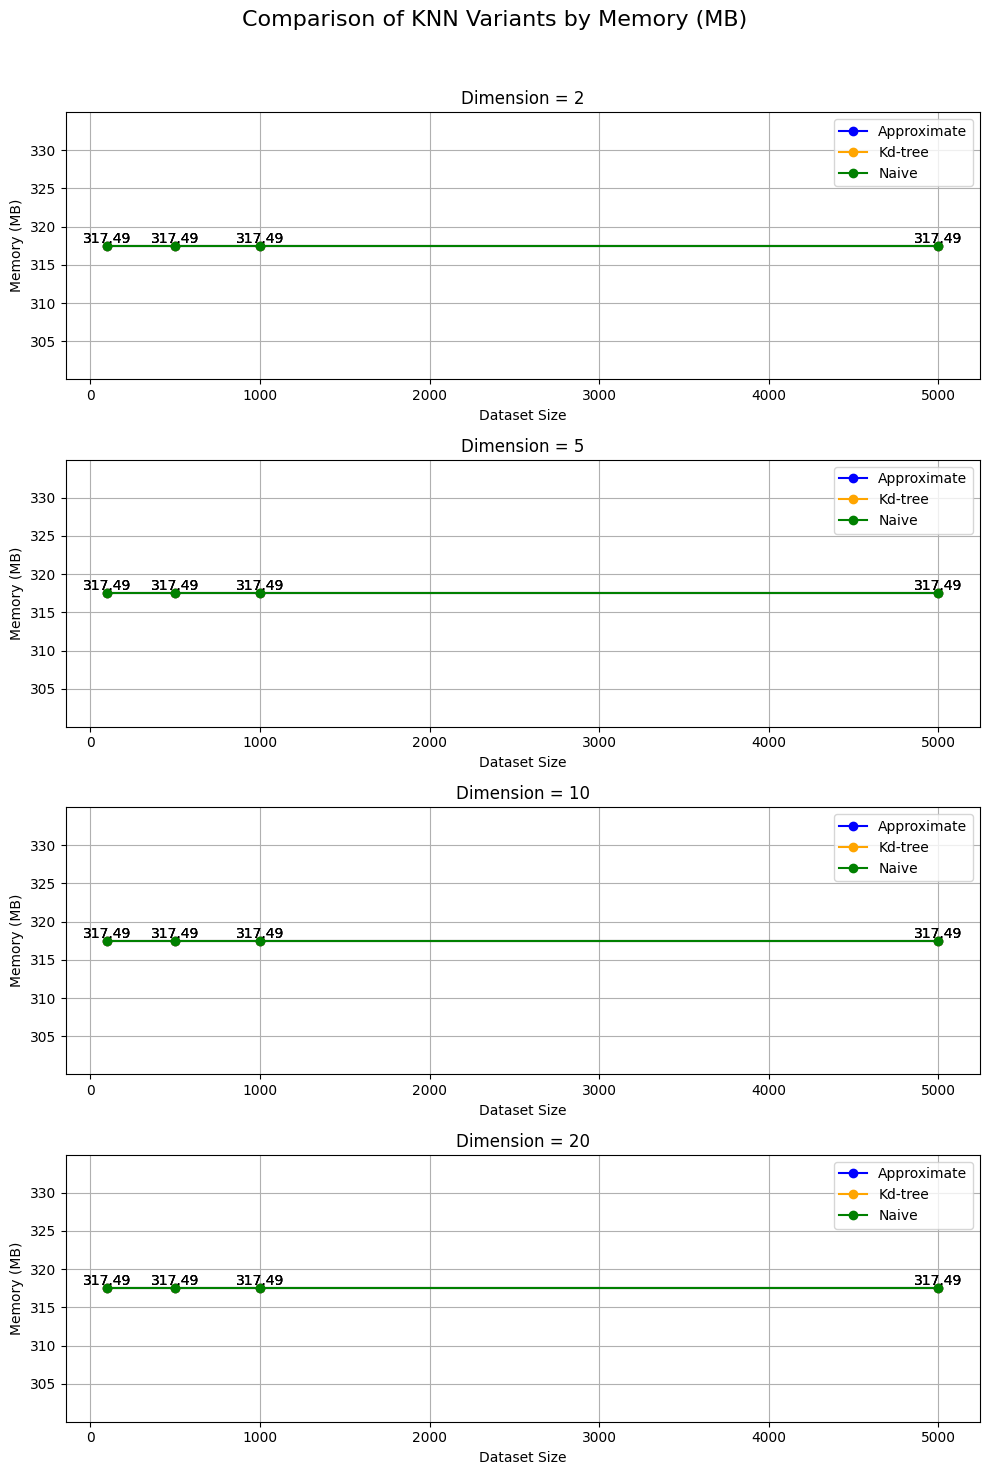

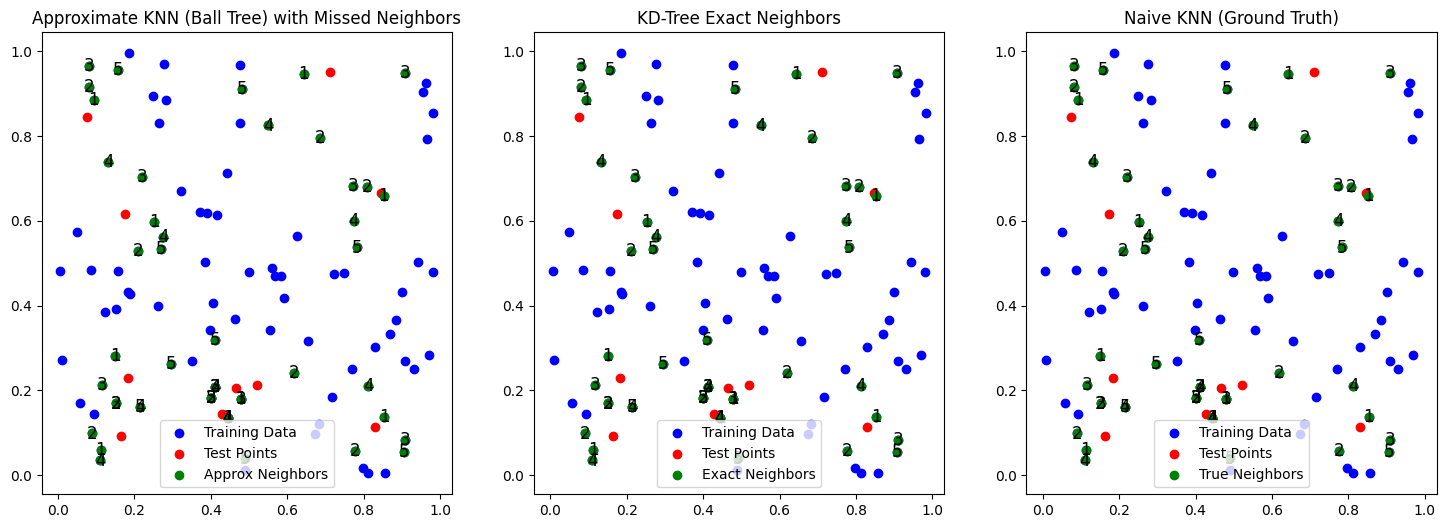

In [26]:
import numpy as np
import time
from memory_profiler import memory_usage
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances

# 1. Implement Approximate KNN using Ball Tree
def approximate_knn(X_train, X_test, K):
    nn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree')
    nn.fit(X_train)
    distances, indices = nn.kneighbors(X_test)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Performance Evaluation with Training and Testing Time
def evaluate_knn_variants():
    results = []
    dataset_sizes = [100, 500, 1000, 5000]
    dimensions = [2, 5, 10, 20]
    K = 5

    for N in dataset_sizes:
        for D in dimensions:
            X_train = np.random.rand(N, D)
            X_test = np.random.rand(10, D)

            for method, func in [('Approximate', approximate_knn),
                                 ('KD-Tree', kd_tree_knn),
                                 ('Naive', naive_knn)]:
                # Training time
                start_train = time.time()
                func(X_train, X_test[:1], K)  # fitting the model for training time estimation
                train_time = time.time() - start_train

                # Testing time (finding neighbors for test set)
                start_test = time.time()
                func(X_train, X_test, K)
                test_time = time.time() - start_test

                # Memory usage
                mem_usage = memory_usage((func, (X_train, X_test, K)))
                avg_mem = np.mean(mem_usage)
                
                results.append({
                    'Method': method,
                    'Dataset Size': N,
                    'Dimensions': D,
                    'Train Time (s)': train_time,
                    'Test Time (s)': test_time,
                    'Memory (MB)': avg_mem
                })

    return pd.DataFrame(results)

# 5. Plotting Function for Comparison
def plot_comparison(df):
    metrics = ['Train Time (s)', 'Test Time (s)']
    dataset_sizes = df['Dataset Size'].unique()
    dimensions = df['Dimensions'].unique()

    for metric in metrics:
        fig, ax = plt.subplots(len(dimensions), 1, figsize=(10, 15), sharex=True)
        fig.suptitle(f'Comparison of KNN Variants by {metric}')

        for idx, D in enumerate(dimensions):
            sub_df = df[df['Dimensions'] == D]
            bar_width = 0.25
            x = np.arange(len(dataset_sizes))

            for i, method in enumerate(['Approximate', 'KD-Tree', 'Naive']):
                values = sub_df[sub_df['Method'] == method][metric]
                ax[idx].bar(x + i * bar_width, values, width=bar_width, label=method)

            ax[idx].set_title(f'Dimension = {D}')
            ax[idx].set_xticks(x + bar_width)
            ax[idx].set_xticklabels(dataset_sizes)
            ax[idx].set_xlabel('Dataset Size')
            ax[idx].set_ylabel(metric)
            ax[idx].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
        plt.show()
        
# Plot memory results
def plot_memory_comparison(memory_results, dimensions, dataset_sizes):
    fig, axes = plt.subplots(len(dimensions), 1, figsize=(10, 15))
    fig.suptitle("Comparison of KNN Variants by Memory (MB)", fontsize=16)
    colors = ['blue', 'orange', 'green']
    
    for i, dim in enumerate(dimensions):
        ax = axes[i]
        ax.set_title(f"Dimension = {dim}")
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel("Memory (MB)")
        
        for j, method in enumerate(["Approximate", "KD-Tree", "Naive"]):
            # Access memory results for the specific dimension and method using multi-level indexing
            ax.plot(dataset_sizes, memory_results.loc[dim, method], label=method.capitalize(), color=colors[j], marker='o')
            for k, value in enumerate(memory_results.loc[dim, method]):
                ax.text(dataset_sizes[k], value, f"{value:.2f}", ha='center', va='bottom')
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

        

# 6. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K):
    indices_approx, _ = approximate_knn(X_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    plt.figure(figsize=(18, 6))

    # Plotting Approximate KNN Results with Missed Neighbors Highlighted
    plt.subplot(1, 3, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Approximate KNN (Ball Tree) with Missed Neighbors")
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(1, 3, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting Naive KNN Results (Ground Truth)
    plt.subplot(1, 3, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()

# Main Execution
if __name__ == "__main__":
    # Part 1: Run Performance Evaluation and Display Results
    df_results = evaluate_knn_variants()
    print(df_results)

    # Part 2: Plot Comparison of Train Time, Test Time, and Memory Usage
    plot_comparison(df_results)

    # Group memory results by Dimensions and Dataset Size for easy plotting
    memory_results = df_results.groupby(['Dimensions', 'Dataset Size', 'Method'])['Memory (MB)'].mean().unstack(level=2)
    plot_memory_comparison(memory_results, df_results['Dimensions'].unique(), df_results['Dataset Size'].unique())

    # Part 3: Visualization of Neighbors in 2D
    X_train = np.random.rand(100, 2)  # Training data in 2D
    X_test = np.random.rand(10, 2)    # Test data in 2D
    K = 5
    visualize_knn_2d(X_train, X_test, K)


below is dataset with more number of points-1000

         Method  Dataset Size  Dimensions  Train Time (s)  Test Time (s)  \
0   Approximate           100           2        0.003053       0.000916   
1       KD-Tree           100           2        0.000453       0.000217   
2         Naive           100           2        0.002542       0.007004   
3   Approximate           100           5        0.002421       0.000898   
4       KD-Tree           100           5        0.000477       0.000238   
5         Naive           100           5        0.000838       0.000432   
6   Approximate           100          10        0.002639       0.001007   
7       KD-Tree           100          10        0.000441       0.000262   
8         Naive           100          10        0.000884       0.000409   
9   Approximate           100          20        0.002665       0.000979   
10      KD-Tree           100          20        0.000491       0.000294   
11        Naive           100          20        0.001103       0.000646   
12  Approxim

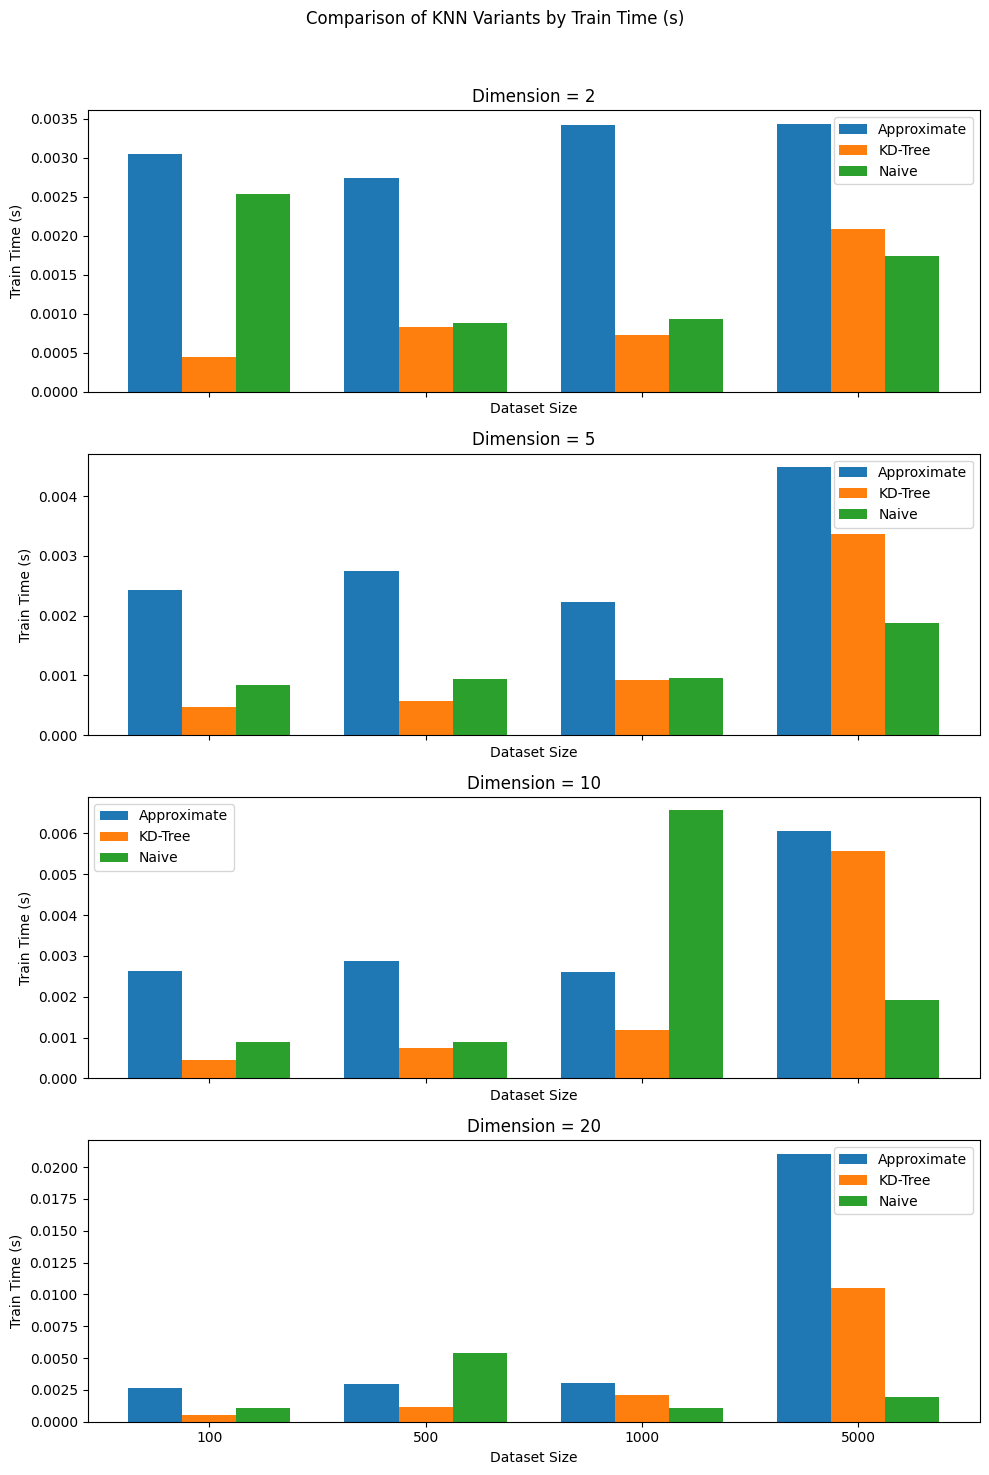

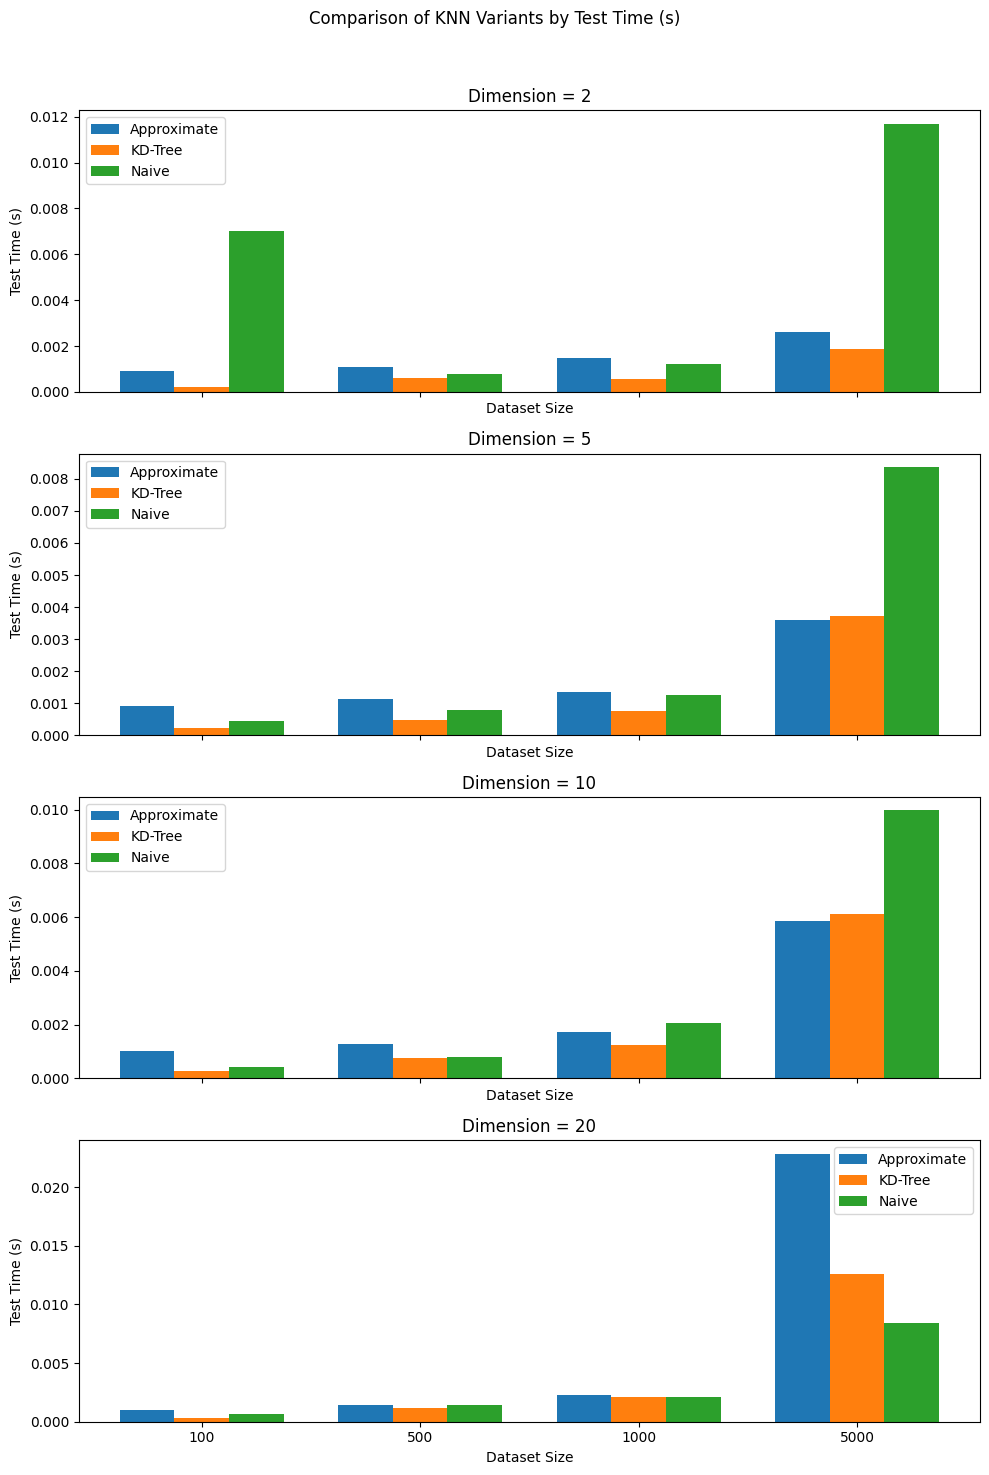

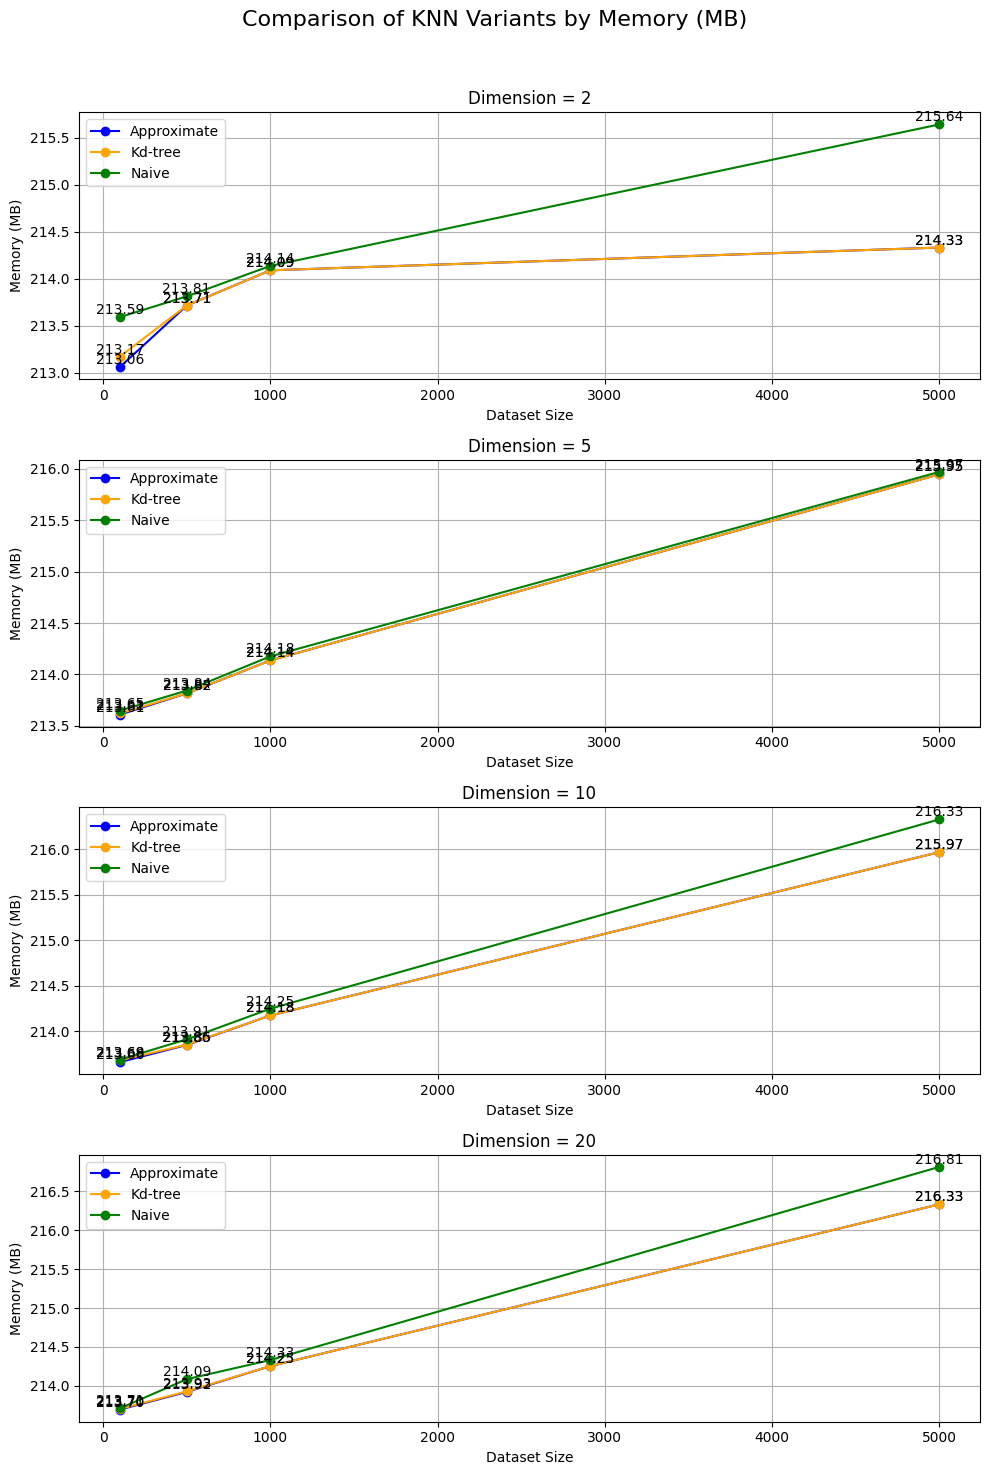

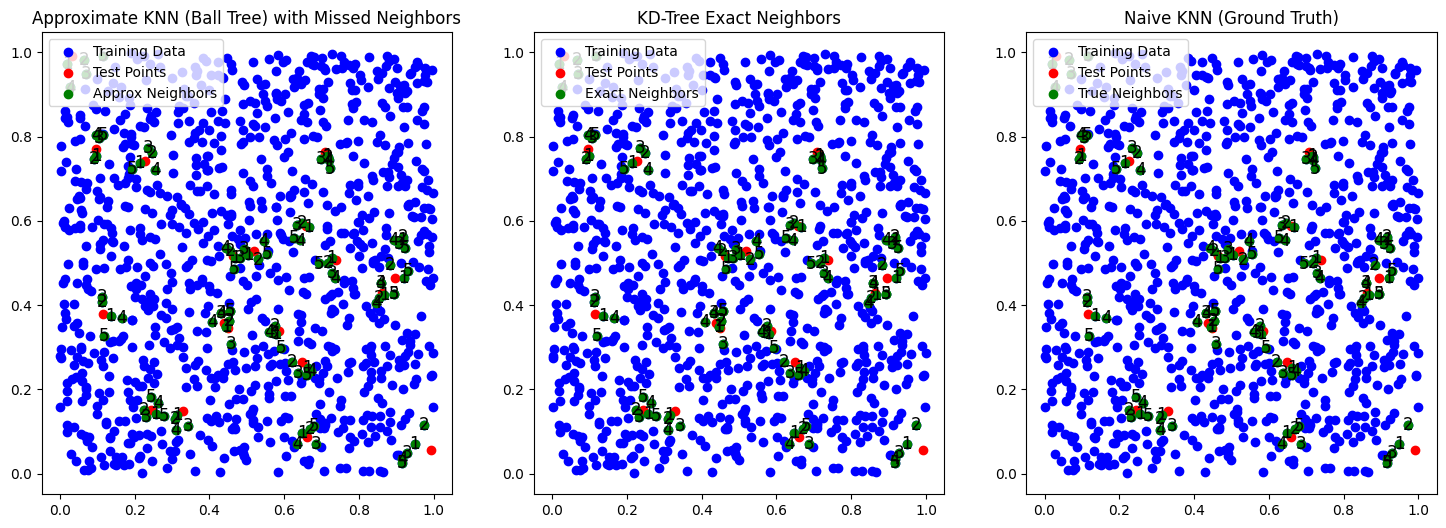

In [1]:
import numpy as np
import time
from memory_profiler import memory_usage
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances

# 1. Implement Approximate KNN using Ball Tree
def approximate_knn(X_train, X_test, K):
    nn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree')
    nn.fit(X_train)
    distances, indices = nn.kneighbors(X_test)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Performance Evaluation with Training and Testing Time
def evaluate_knn_variants():
    results = []
    dataset_sizes = [100, 500, 1000, 5000]
    dimensions = [2, 5, 10, 20]
    K = 5

    for N in dataset_sizes:
        for D in dimensions:
            X_train = np.random.rand(N, D)
            X_test = np.random.rand(10, D)

            for method, func in [('Approximate', approximate_knn),
                                 ('KD-Tree', kd_tree_knn),
                                 ('Naive', naive_knn)]:
                # Training time
                start_train = time.time()
                func(X_train, X_test[:1], K)  # fitting the model for training time estimation
                train_time = time.time() - start_train

                # Testing time (finding neighbors for test set)
                start_test = time.time()
                func(X_train, X_test, K)
                test_time = time.time() - start_test

                # Memory usage
                mem_usage = memory_usage((func, (X_train, X_test, K)))
                avg_mem = np.mean(mem_usage)
                
                results.append({
                    'Method': method,
                    'Dataset Size': N,
                    'Dimensions': D,
                    'Train Time (s)': train_time,
                    'Test Time (s)': test_time,
                    'Memory (MB)': avg_mem
                })

    return pd.DataFrame(results)

# 5. Plotting Function for Comparison
def plot_comparison(df):
    metrics = ['Train Time (s)', 'Test Time (s)']
    dataset_sizes = df['Dataset Size'].unique()
    dimensions = df['Dimensions'].unique()

    for metric in metrics:
        fig, ax = plt.subplots(len(dimensions), 1, figsize=(10, 15), sharex=True)
        fig.suptitle(f'Comparison of KNN Variants by {metric}')

        for idx, D in enumerate(dimensions):
            sub_df = df[df['Dimensions'] == D]
            bar_width = 0.25
            x = np.arange(len(dataset_sizes))

            for i, method in enumerate(['Approximate', 'KD-Tree', 'Naive']):
                values = sub_df[sub_df['Method'] == method][metric]
                ax[idx].bar(x + i * bar_width, values, width=bar_width, label=method)

            ax[idx].set_title(f'Dimension = {D}')
            ax[idx].set_xticks(x + bar_width)
            ax[idx].set_xticklabels(dataset_sizes)
            ax[idx].set_xlabel('Dataset Size')
            ax[idx].set_ylabel(metric)
            ax[idx].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
        plt.show()
        
# Plot memory results
def plot_memory_comparison(memory_results, dimensions, dataset_sizes):
    fig, axes = plt.subplots(len(dimensions), 1, figsize=(10, 15))
    fig.suptitle("Comparison of KNN Variants by Memory (MB)", fontsize=16)
    colors = ['blue', 'orange', 'green']
    
    for i, dim in enumerate(dimensions):
        ax = axes[i]
        ax.set_title(f"Dimension = {dim}")
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel("Memory (MB)")
        
        for j, method in enumerate(["Approximate", "KD-Tree", "Naive"]):
            # Access memory results for the specific dimension and method using multi-level indexing
            ax.plot(dataset_sizes, memory_results.loc[dim, method], label=method.capitalize(), color=colors[j], marker='o')
            for k, value in enumerate(memory_results.loc[dim, method]):
                ax.text(dataset_sizes[k], value, f"{value:.2f}", ha='center', va='bottom')
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

        

# 6. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K):
    indices_approx, _ = approximate_knn(X_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    plt.figure(figsize=(18, 6))

    # Plotting Approximate KNN Results with Missed Neighbors Highlighted
    plt.subplot(1, 3, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Approximate KNN (Ball Tree) with Missed Neighbors")
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(1, 3, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting Naive KNN Results (Ground Truth)
    plt.subplot(1, 3, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()

# Main Execution
if __name__ == "__main__":
    # Part 1: Run Performance Evaluation and Display Results
    df_results = evaluate_knn_variants()
    print(df_results)

    # Part 2: Plot Comparison of Train Time, Test Time, and Memory Usage
    plot_comparison(df_results)

    # Group memory results by Dimensions and Dataset Size for easy plotting
    memory_results = df_results.groupby(['Dimensions', 'Dataset Size', 'Method'])['Memory (MB)'].mean().unstack(level=2)
    plot_memory_comparison(memory_results, df_results['Dimensions'].unique(), df_results['Dataset Size'].unique())

    # Part 3: Visualization of Neighbors in 2D
    X_train = np.random.rand(00, 2)  # Training data in 2D
    X_test = np.random.rand(20, 2)    # Test data in 2D
    K = 5
    visualize_knn_2d(X_train, X_test, K)


In [ ]:
below code uses newer techniques

     Method  Dataset Size  Dimensions  Time (s)  Memory (MB)
0       LSH           100           2  0.155842   246.592634
1   KD-Tree           100           2  0.000654   246.585938
2     Naive           100           2  0.010331   246.588542
3       LSH           100          10  0.112120   246.591146
4   KD-Tree           100          10  0.000700   246.585938
5     Naive           100          10  0.051409   246.597656
6       LSH           500           2  0.116606   246.609375
7   KD-Tree           500           2  0.000730   246.601562
8     Naive           500           2  0.134546   246.625000
9       LSH           500          10  0.016452   246.635417
10  KD-Tree           500          10  0.001141   246.625000
11    Naive           500          10  0.099951   246.636364
12      LSH          1000           2  0.034568   246.658854
13  KD-Tree          1000           2  0.001291   246.660156
14    Naive          1000           2  0.022752   246.665365
15      LSH          100

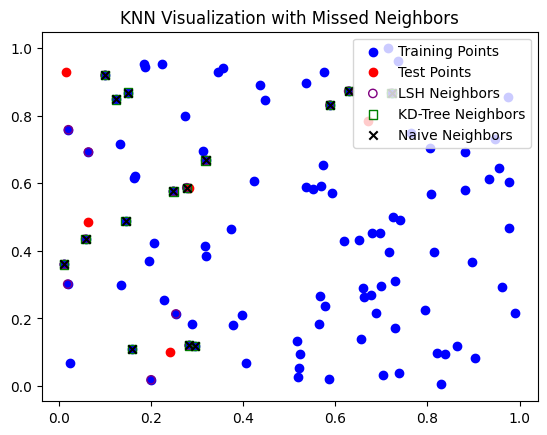

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from memory_profiler import memory_usage
import pandas as pd
import time

# 1. Implement LSH using Random Projections
def lsh_knn(X_train, X_test, K, projections=5):
    np.random.seed(0)
    R = np.random.randn(X_train.shape[1], projections)
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train)
    distances, indices = nn.kneighbors(X_test)
    return indices, distances

# 4. Performance Evaluation
def evaluate_knn_variants(dataset_sizes=[100, 500, 1000], dimensions=[2, 10], K=5):
    results = []
    for N in dataset_sizes:
        for D in dimensions:
            X_train = np.random.rand(N, D)
            X_test = np.random.rand(10, D)
            for name, func in [('LSH', lsh_knn), ('KD-Tree', kd_tree_knn), ('Naive', naive_knn)]:
                start_time = time.time()
                func(X_train, X_test, K)
                exec_time = time.time() - start_time
                mem_usage = memory_usage((func, (X_train, X_test, K)))
                avg_mem = np.mean(mem_usage)
                results.append({'Method': name, 'Dataset Size': N, 'Dimensions': D, 'Time (s)': exec_time, 'Memory (MB)': avg_mem})
    return pd.DataFrame(results)

# 5. Visualize Missed Neighbors and Partitions
def visualize_knn_2d(X_train, X_test, K):
    indices_lsh, _ = lsh_knn(X_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c='blue', label="Training Points")
    plt.scatter(X_test[:, 0], X_test[:, 1], c='red', label="Test Points")

    for idx, test_pt in enumerate(X_test):
        plt.scatter(X_train[indices_lsh[idx], 0], X_train[indices_lsh[idx], 1], marker='o', edgecolor='purple', facecolors='none', label="LSH Neighbors" if idx == 0 else "")
        plt.scatter(X_train[indices_kd[idx], 0], X_train[indices_kd[idx], 1], marker='s', edgecolor='green', facecolors='none', label="KD-Tree Neighbors" if idx == 0 else "")
        plt.scatter(X_train[indices_naive[idx], 0], X_train[indices_naive[idx], 1], marker='x', color='black', label="Naive Neighbors" if idx == 0 else "")

    plt.legend()
    plt.title("KNN Visualization with Missed Neighbors")
    plt.show()

# Example execution
df_results = evaluate_knn_variants()
print(df_results)
X_train = np.random.rand(100, 2)
X_test = np.random.rand(5, 2)
visualize_knn_2d(X_train, X_test, K=3)


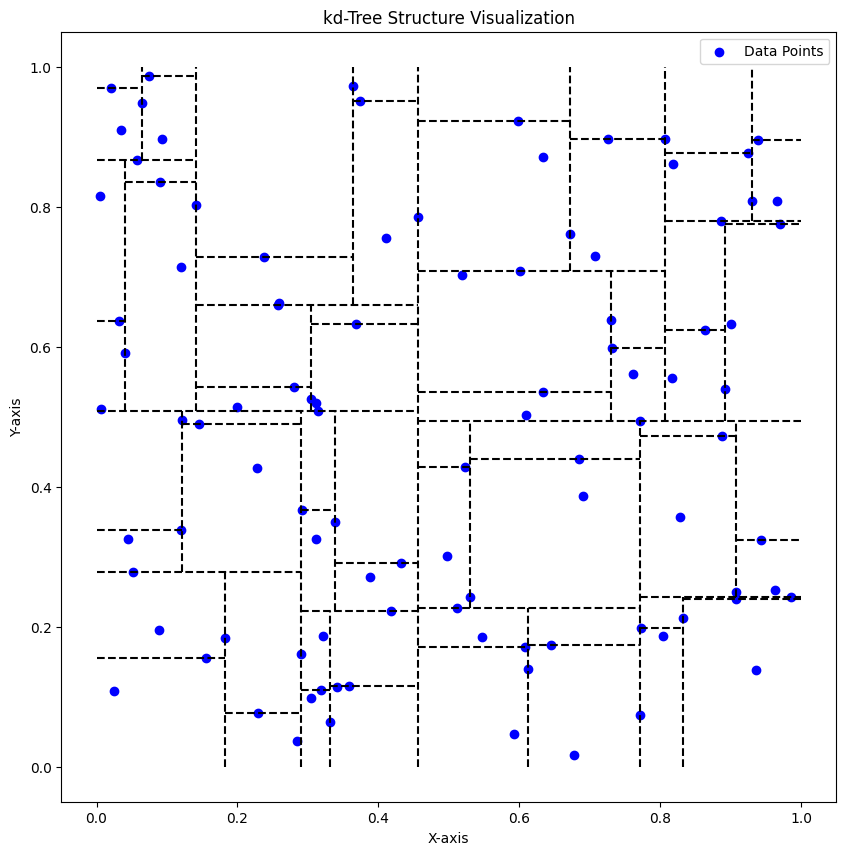

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

# Parameters
DIMENSIONS = 2  # Dimension of the space
N_POINTS = 100  # Number of data points

# Step 1: Generate synthetic data
np.random.seed(42)
data_points = np.random.rand(N_POINTS, DIMENSIONS)

# Step 2: kd-Tree Construction
kd_tree = KDTree(data_points)

# Step 3: kd-Tree Visualization
def visualize_kdtree(points, depth=0, bounds=[[0, 1], [0, 1]]):
    """
    Visualizes kd-tree splits up to a certain depth for a 2D dataset.
    """
    if depth > 6 or len(points) <= 1:  # Limit visualization depth to avoid too many splits
        return
    
    axis = depth % DIMENSIONS
    sorted_points = points[points[:, axis].argsort()]  # Sort points along the current axis
    median_idx = len(sorted_points) // 2  # Find the median index
    median_point = sorted_points[median_idx]

    # Plot the split line
    if axis == 0:
        plt.plot([median_point[0], median_point[0]], bounds[1], 'k--')
        left_bounds = [[bounds[0][0], median_point[0]], bounds[1]]
        right_bounds = [[median_point[0], bounds[0][1]], bounds[1]]
    else:
        plt.plot(bounds[0], [median_point[1], median_point[1]], 'k--')
        left_bounds = [bounds[0], [bounds[1][0], median_point[1]]]
        right_bounds = [bounds[0], [median_point[1], bounds[1][1]]]

    # Recursively visualize the left and right splits
    visualize_kdtree(sorted_points[:median_idx], depth + 1, left_bounds)
    visualize_kdtree(sorted_points[median_idx + 1:], depth + 1, right_bounds)

# Plot data points and kd-tree structure
plt.figure(figsize=(10, 10))
plt.scatter(data_points[:, 0], data_points[:, 1], color='b', label="Data Points")
visualize_kdtree(data_points)
plt.title("kd-Tree Structure Visualization")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()


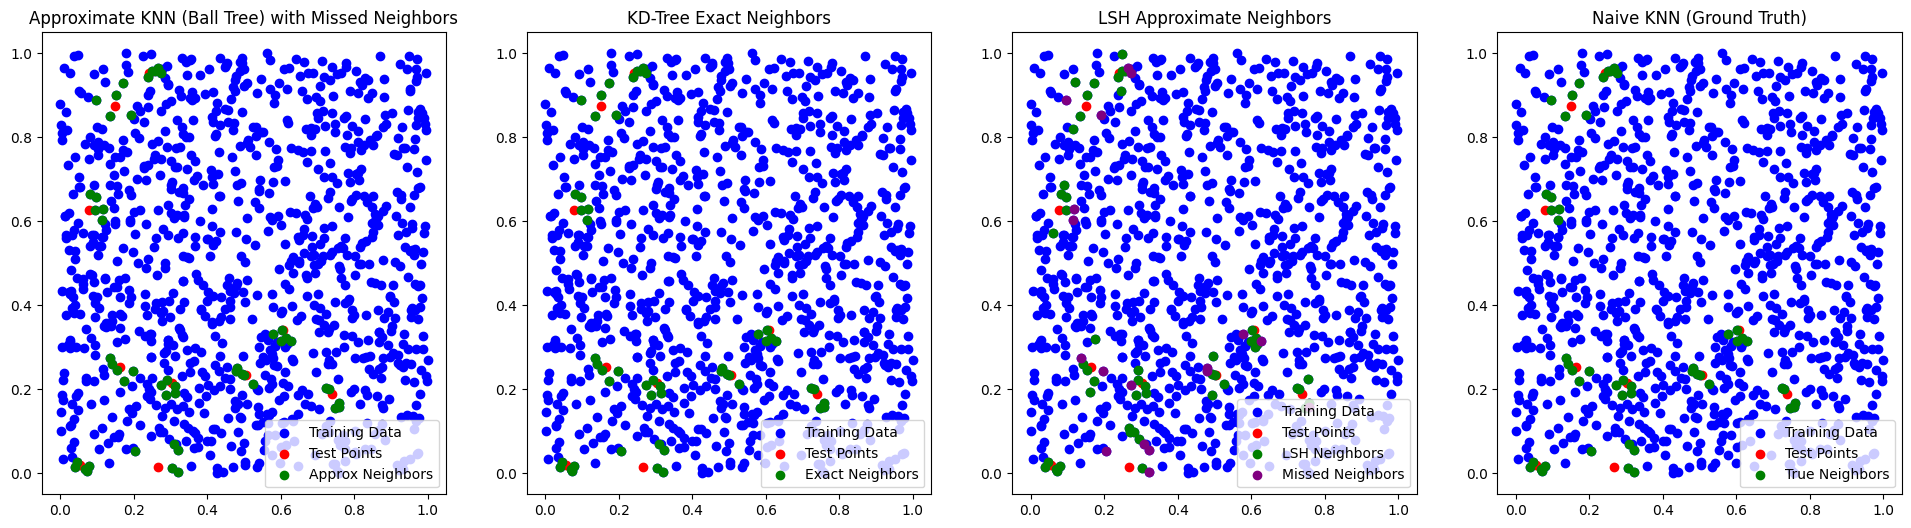

In [9]:
import numpy as np
import time
from memory_profiler import memory_usage
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances

# 1. Implement Approximate KNN using Ball Tree with adjustable leaf size for more missed neighbors
def approximate_knn(X_train, X_test, K, leaf_size=5):  # Smaller leaf size may result in more missed neighbors
    nn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree', leaf_size=leaf_size)
    nn.fit(X_train)
    distances, indices = nn.kneighbors(X_test)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Implement LSH using Random Projections
def lsh_knn(X_train, X_test, K, projections=5):
    np.random.seed(0)
    R = np.random.randn(X_train.shape[1], projections)
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances

# 5. Function to visualize partitions in 2D for KD-Tree
def plot_kd_tree_partitions(X_train, tree, depth=0, min_val=0, max_val=1):
    if tree is None:
        return
    axis = depth % X_train.shape[1]
    median_point = X_train[tree.idx]  # get the median point on this split
    
    if axis == 0:  # Vertical split
        plt.axvline(x=median_point[0], color='k', linestyle='--', alpha=0.3)
        plot_kd_tree_partitions(tree.left, depth + 1, min_val, median_point[0])
        plot_kd_tree_partitions(tree.right, depth + 1, median_point[0], max_val)
    else:  # Horizontal split
        plt.axhline(y=median_point[1], color='k', linestyle='--', alpha=0.3)
        plot_kd_tree_partitions(tree.left, depth + 1, min_val, median_point[1])
        plot_kd_tree_partitions(tree.right, depth + 1, median_point[1], max_val)

# 6. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K, leaf_size=5):
    indices_approx, _ = approximate_knn(X_train, X_test, K, leaf_size=leaf_size)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_lsh, _ = lsh_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    plt.figure(figsize=(24, 6))

    # Plotting Approximate KNN Results (Ball Tree) with Missed Neighbors Highlighted
    plt.subplot(1, 4, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
    
    plt.title("Approximate KNN (Ball Tree) with Missed Neighbors")
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(1, 4, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
    
    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting LSH Results with Missed Neighbors Highlighted
    plt.subplot(1, 4, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_lsh[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="LSH Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
    
    plt.title("LSH Approximate Neighbors")
    plt.legend()

    # Plotting Naive KNN Results (Ground Truth)
    plt.subplot(1, 4, 4)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
    
    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()

# Main Execution
if __name__ == "__main__":
    # Generate synthetic data for visualization
    X_train = np.random.rand(1000, 2)  # Training data in 2D
    X_test = np.random.rand(10, 2)    # Test data in 2D
    K = 5
    visualize_knn_2d(X_train, X_test, K, leaf_size=5)  # Use smaller leaf_size to increase missed neighbors in Ball Tree


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


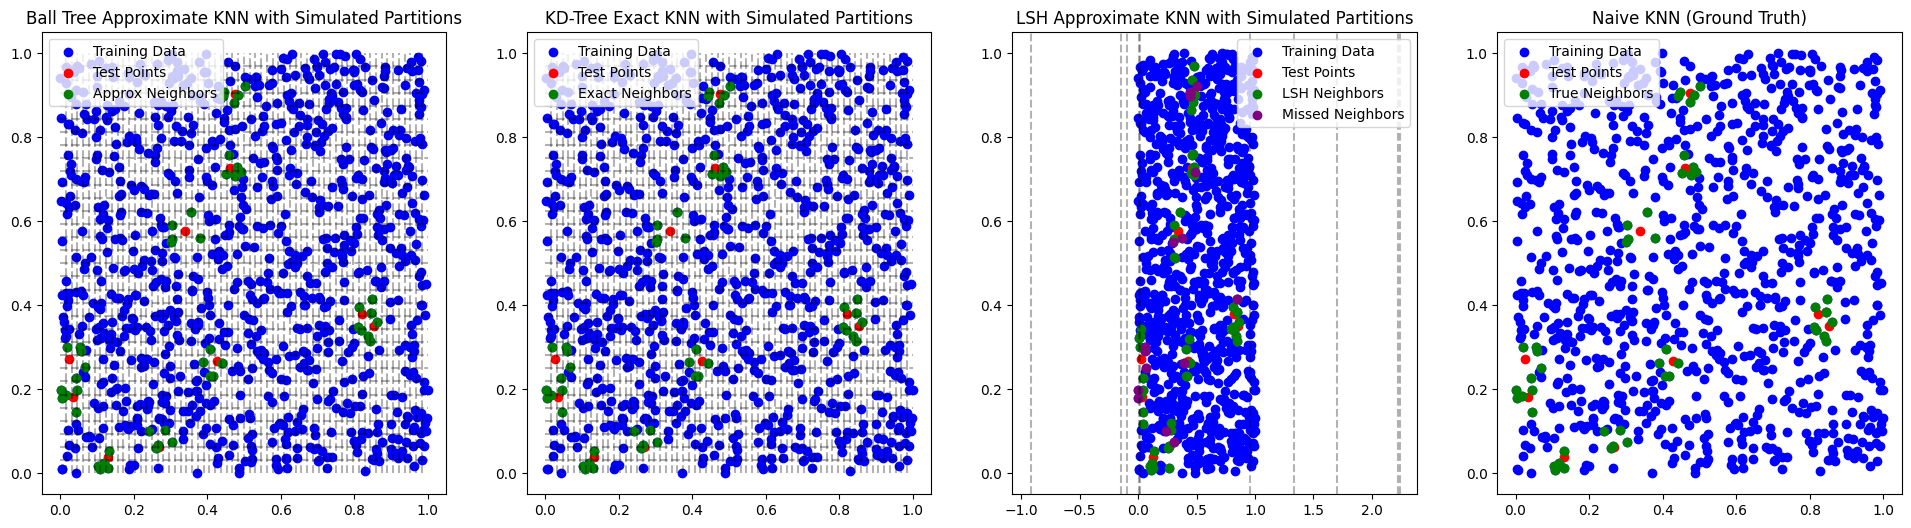

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state

# Helper function to simulate recursive splitting for KD-Tree and Ball Tree
def plot_splits(X_train, depth=0, min_val=(0, 0), max_val=(1, 1), color='k', linestyle='--', alpha=0.3):
    if depth > 10:  # Stop recursion at reasonable depth for visualization
        return
    
    axis = depth % 2  # Alternate between x and y axes
    mid_point = (max_val[axis] + min_val[axis]) / 2

    if axis == 0:  # Vertical line for x-axis split
        plt.plot([mid_point, mid_point], [min_val[1], max_val[1]], color=color, linestyle=linestyle, alpha=alpha)
        plot_splits(X_train, depth + 1, min_val, (mid_point, max_val[1]), color, linestyle, alpha)
        plot_splits(X_train, depth + 1, (mid_point, min_val[1]), max_val, color, linestyle, alpha)
    else:  # Horizontal line for y-axis split
        plt.plot([min_val[0], max_val[0]], [mid_point, mid_point], color=color, linestyle=linestyle, alpha=alpha)
        plot_splits(X_train, depth + 1, min_val, (max_val[0], mid_point), color, linestyle, alpha)
        plot_splits(X_train, depth + 1, (min_val[0], mid_point), max_val, color, linestyle, alpha)

# Function to simulate partitions for LSH by drawing gridlines
def plot_lsh_partitions(X_train, projections=5):
    random_state = check_random_state(0)
    R = random_state.randn(X_train.shape[1], projections)
    proj = X_train @ R
    
    for i in range(projections):
        plt.axvline(x=proj[:, i].min(), color='k', linestyle='--', alpha=0.3)
        plt.axvline(x=proj[:, i].max(), color='k', linestyle='--', alpha=0.3)

# Function to run approximate KNN using Ball Tree
def approximate_knn(X_train, X_test, K, leaf_size=5):
    nn = NearestNeighbors(n_neighbors=K, algorithm='ball_tree', leaf_size=leaf_size)
    nn.fit(X_train)
    distances, indices = nn.kneighbors(X_test)
    return indices, distances

# Function to run exact KNN using KD-Tree
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# Function to run Naive KNN (Brute-force)
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    return indices, np.take_along_axis(distances, indices, axis=1)

# Function to run approximate KNN using LSH (Locality-Sensitive Hashing)
def lsh_knn(X_train, X_test, K, projections=5):
    random_state = check_random_state(0)
    R = random_state.randn(X_train.shape[1], projections)
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances

# Visualization function for neighbors and partitions
def visualize_knn_2d(X_train, X_test, K, leaf_size=5):
    indices_approx, _ = approximate_knn(X_train, X_test, K, leaf_size=leaf_size)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_lsh, _ = lsh_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    plt.figure(figsize=(24, 6))

    # Plotting Ball Tree Approximate KNN with Simulated Partitions
    plt.subplot(1, 4, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
    
    plt.title("Ball Tree Approximate KNN with Simulated Partitions")
    plot_splits(X_train)
    plt.legend()

    # Plotting KD-Tree Exact KNN with Simulated Partitions
    plt.subplot(1, 4, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
    
    plt.title("KD-Tree Exact KNN with Simulated Partitions")
    plot_splits(X_train)
    plt.legend()

    # Plotting LSH Approximate KNN with Simulated Partitions
    plt.subplot(1, 4, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_lsh[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="LSH Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
    
    plt.title("LSH Approximate KNN with Simulated Partitions")
    plot_lsh_partitions(X_train)
    plt.legend()

    # Plotting Naive KNN (Ground Truth)
    plt.subplot(1, 4, 4)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
    
    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()

# Main Execution
if __name__ == "__main__":
    # Generate synthetic data for visualization
    X_train = np.random.rand(1000, 2)  # Training data in 2D
    X_test = np.random.rand(10, 2)    # Test data in 2D
    K = 5
    visualize_knn_2d(X_train, X_test, K, leaf_size=5)


# TRIAL CODE****

Dataset Size: 100, Dimensions: 2
Naive KNN Training Time: 0
Naive KNN Testing Time: 0.0011140987873077392
LSH KNN Training Time: 0.00012013578414916993
LSH KNN Testing Time: 0.0004258673191070557
KD-tree KNN Training Time: 7.176399230957031e-05
KD-tree KNN Testing Time: 0.00010204315185546875
Naive KNN Memory Usage: (320, 4640) bytes
LSH KNN Memory Usage: (3120, 12732) bytes
KD-tree KNN Memory Usage: (1784, 5888) bytes


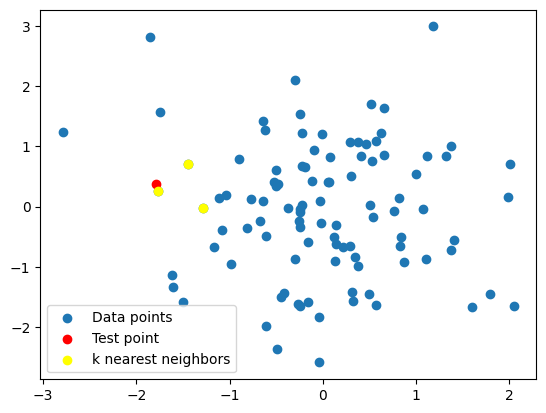

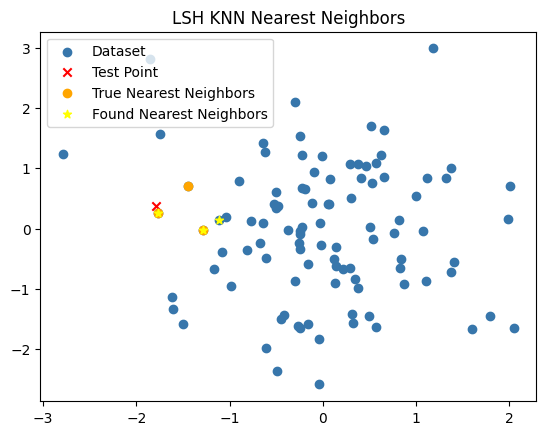

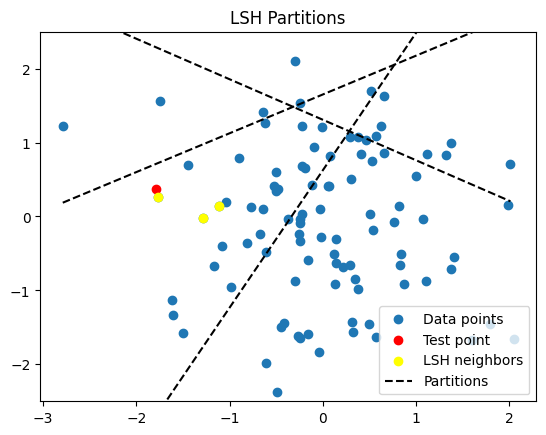

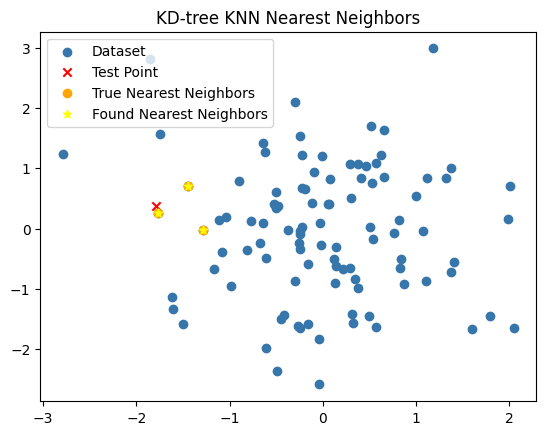

Dataset Size: 500, Dimensions: 2
Naive KNN Training Time: 0
Naive KNN Testing Time: 0.005618620395660401
LSH KNN Training Time: 0.00039208364486694337
LSH KNN Testing Time: 0.002211543321609497
KD-tree KNN Training Time: 0.00020551681518554688
KD-tree KNN Testing Time: 0.00011992454528808594
Naive KNN Memory Usage: (320, 35172) bytes
LSH KNN Memory Usage: (15300, 41835) bytes
KD-tree KNN Memory Usage: (4968, 9336) bytes


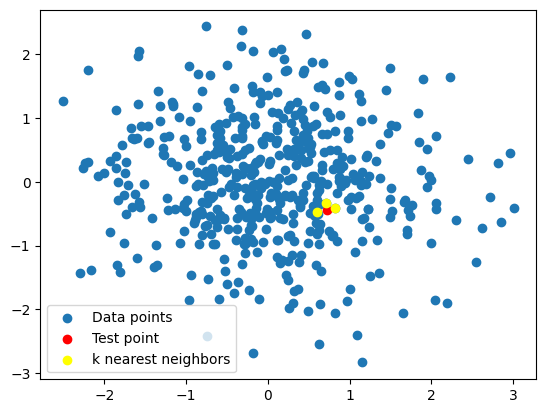

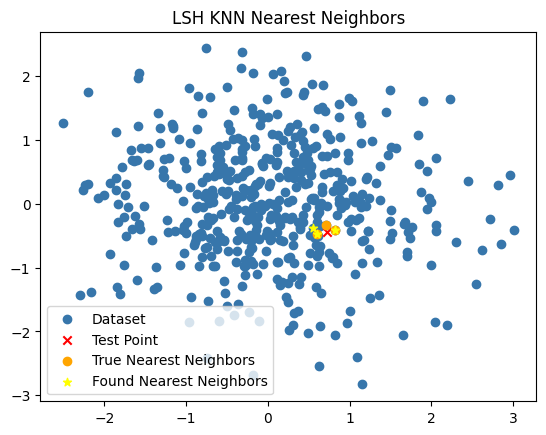

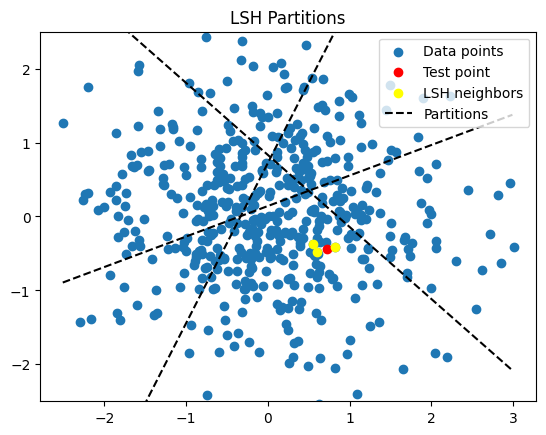

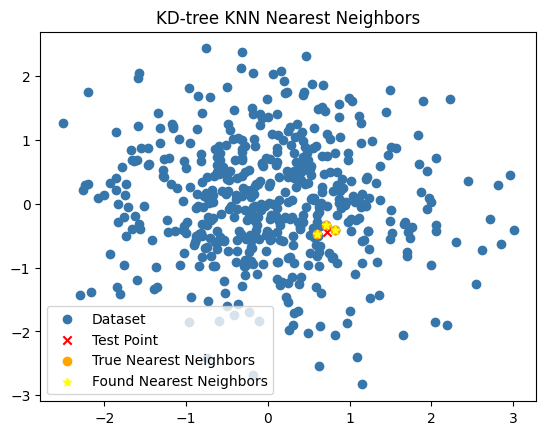

Dataset Size: 1000, Dimensions: 2
Naive KNN Training Time: 0
Naive KNN Testing Time: 0.011403539896011353
LSH KNN Training Time: 0.000733079195022583
LSH KNN Testing Time: 0.004466551780700684
KD-tree KNN Training Time: 0.0003287792205810547
KD-tree KNN Testing Time: 0.00014352798461914062
Naive KNN Memory Usage: (320, 77796) bytes
LSH KNN Memory Usage: (36308, 94119) bytes
KD-tree KNN Memory Usage: (8968, 17336) bytes


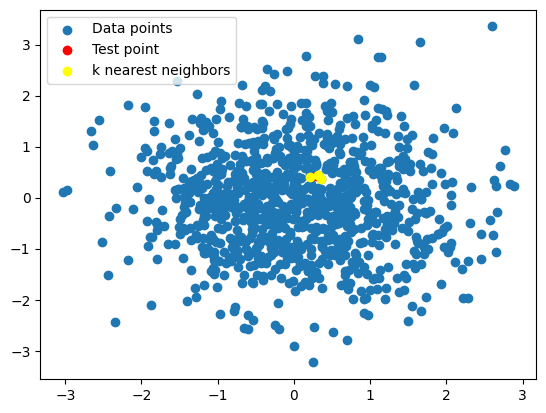

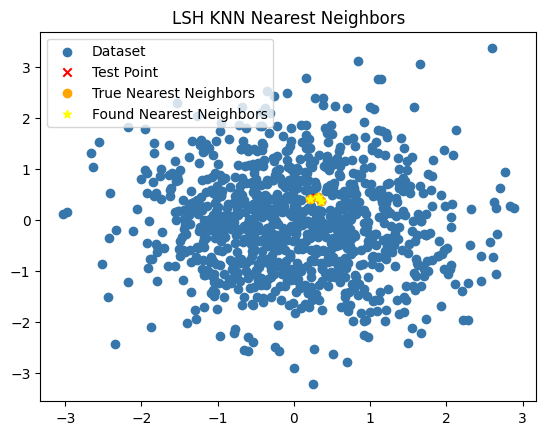

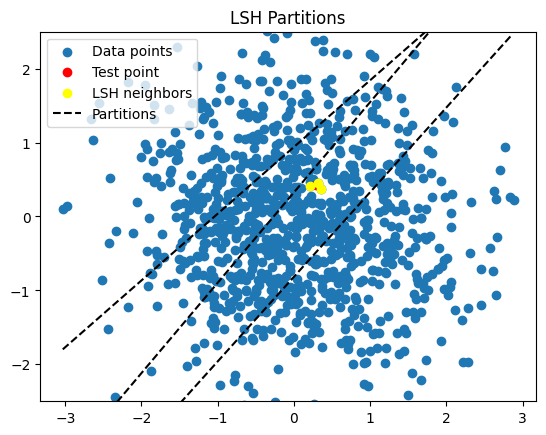

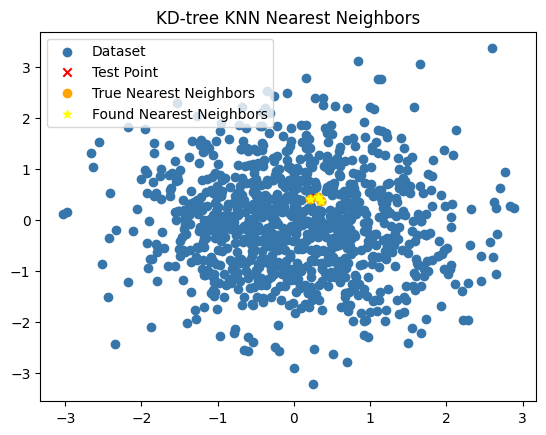

In [2]:
import numpy as np 
import time
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import tracemalloc
import time

# Generate random dataset
def generate_random_dataset(N, D):
    return np.random.randn(N, D)


# Naive KNN implementation
class NaiveKNN:
    def __init__(self, train_data):
        self.train_data = train_data

    def query(self, test_point, K):
        distances = np.sqrt(np.sum((self.train_data - test_point)**2, axis=1))
        nearest_indices = np.argsort(distances)[:K]
        return nearest_indices
def naive_KNN(k, dataset, test_point):
  distances = []

  for i in range(len(dataset)):
    distance = np.sqrt(np.sum((dataset[i] - test_point)**2))
    distances.append((i, distance))
  sorted_distances = sorted(distances, key=lambda x: x[1])
  neighbors = [dataset[index] for (index, dist) in sorted_distances[:k]]

  return neighbors


def creating_bins(p, dataset):
    n, d = dataset.shape
    ones_mat = np.ones((n, 1))

    X = np.hstack([ones_mat, dataset])
    W = np.random.randn(d+1, p)

    H = X @ W > 0

    powers_of_two = (1 << np.arange(p-1, -1, -1))
    int_indices = H.dot(powers_of_two)

    hash_dict = {}
    for i in range(2**p):
        hash_dict[i] = []
    for i in range(n):
        index = int_indices[i]
        hash_dict[index].append(i)

    return W, hash_dict


def find_LSH_neighbors(dataset, test_point, p, k, W, hash_dict):
    n, d = dataset.shape
    ones = np.ones((n,1))
    X = np.hstack([ones, dataset])

    x = np.hstack([[1], test_point])
    h = x @ W > 0

    powers_of_two = (1 << np.arange(p-1, -1, -1))
    int_index = h.dot(powers_of_two)

    bucket_i = hash_dict[int_index]
    bucket = dataset[bucket_i]

    neighbors = naive_KNN(k, bucket, test_point)
    return neighbors
# KD-tree KNN implementation
class KDTreeKNN:
    def __init__(self, train_data):
        self.tree = KDTree(train_data)

    def query(self, test_point, K):
        distances, indices = self.tree.query(test_point, k=K)
        return indices
# Measure time taken for training and testing
def measure_time1(train_data, test_point, K):
    train_time = 0
    test_time = 0
    iter=1000
    for _ in range(iter):
      start_time = time.time()

      neighbors = naive_KNN(K, train_data, test_point)

      end_time = time.time()

      test_time += (end_time- start_time)
    test_time /= iter
    train_time = 0

    return train_time, test_time


def measure_time2(train_data, test_point, K):
    train_time = 0
    test_time = 0
    iter=1000
    for _ in range(iter):
      start_time = time.time()

      W, hash_dict = creating_bins(3, train_data)
      ckpt_1 = time.time()

      lsh_neighbors = find_LSH_neighbors(train_data, test_point, 3, K, W, hash_dict)

      end_time = time.time()

      train_time += (ckpt_1- start_time)
      test_time += (end_time- ckpt_1)
    train_time/=iter
    test_time /= iter

    return train_time, test_time


def measure_time3(model, train_data, test_point, K):
    start_time = time.time()
    KDTreeKNN(train_data=train_data)
    training_time = time.time() - start_time

    start_time = time.time()
    model.query(test_point, K)
    testing_time = time.time() - start_time

    return training_time, testing_time
def memory_usage_knn(train_data, test_point, K):
    tracemalloc.start()
    neighbors = naive_KNN(K, train_data, test_point)
    mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return mem

def memory_usage_lsh(train_data, test_point, K):
    tracemalloc.start()
    W, hash_dict = creating_bins(3, train_data)
    lsh_neighbors = find_LSH_neighbors(train_data, test_point, 3, K, W, hash_dict)
    mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return mem

def memory_usage_kd(train_data, test_point, K):
    tracemalloc.start()
    model = KDTreeKNN(train_data=train_data)
    model.query(test_point, K)
    mem = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return mem
def visualize_missed_neighbors(dataset, true_nearest_points, found_nearest_points, test_point, K, title):
    plt.scatter(dataset[:, 0], dataset[:, 1], color='#3776ab', label='Dataset')
    plt.scatter(test_point[0], test_point[1], color='red', marker='x', label='Test Point')
    # missed_nearest_points = true_nearest_points[~np.isin(true_nearest_points, found_nearest_points).all(axis=1)]
    plt.scatter(true_nearest_points[:, 0], true_nearest_points[:, 1], color='orange', label='True Nearest Neighbors')
    plt.scatter(found_nearest_points[:, 0], found_nearest_points[:, 1], color='yellow', marker = "*", label='Found Nearest Neighbors')
    # plt.scatter(missed_nearest_points[:, 0], missed_nearest_points[:, 1], color='purple', label='Missed Nearest Neighbors')
    plt.title(title)
    plt.legend()
    plt.show()

def plot_knn(dataset, test_point, neighbors):
  plt.scatter(dataset[:, 0], dataset[:, 1], label='Data points')
  plt.scatter(test_point[0], test_point[1], label='Test point', c='red')
  plt.scatter(neighbors[:, 0], neighbors[:, 1], label='k nearest neighbors', c='yellow')
  plt.legend()
  plt.show()

def plot_lsh(W, dataset, test_point, lsh_neighbors):
  plt.scatter(dataset[:, 0], dataset[:, 1], label='Data points')
  plt.scatter(test_point[0], test_point[1], label='Test point', c='red')
  plt.scatter(lsh_neighbors[:, 0], lsh_neighbors[:, 1], label='LSH neighbors', c='yellow')

  for i in range(W.shape[1] - 1):
    plt.plot(np.arange(min(dataset[:, 0]), max(dataset[:, 0]), 0.1), W[:, i][0]+W[:, i][1]*np.arange(min(dataset[:, 0]), max(dataset[:, 0]), 0.1)+W[:, i][2]*np.arange(min(dataset[:, 0]), max(dataset[:, 0]), 0.1), linestyle='--', c='black')

  plt.plot(np.arange(min(dataset[:, 0]), max(dataset[:, 0]), 0.1), W[:, W.shape[1]-1][0]+W[:, W.shape[1]-1][1]*np.arange(min(dataset[:, 0]), max(dataset[:, 0]), 0.1)+W[:, W.shape[1]-1][2]*np.arange(min(dataset[:, 0]), max(dataset[:, 0]), 0.1), linestyle='--', c='black', label='Partitions')
  plt.ylim(top=2.5, bottom=-2.5)
  plt.title('LSH Partitions')
  plt.legend()
  plt.show()
def main():
    N_values = [100, 500, 1000]
    D_values = [2]
    K = 3

    for N in N_values:
        for D in D_values:
            print(f"Dataset Size: {N}, Dimensions: {D}")
            # Generate dataset
            dataset = generate_random_dataset(N, D)

            # Generate test data
            test_data = np.random.randn(D)

            # Naive KNN
            neighbors_naive = naive_KNN(K, dataset, test_data)
            neighbors = np.array([list(neighbors_naive[0]), list(neighbors_naive[1]), list(neighbors_naive[2])])
            naive_training_time, naive_testing_time = measure_time1(dataset, test_data, K)
            print("Naive KNN Training Time:", naive_training_time)
            print("Naive KNN Testing Time:", naive_testing_time)

            # LSH KNN
            p = 3
            W, hash_dict = creating_bins(p, dataset)
            neighbors_lsh = find_LSH_neighbors(dataset, test_data, p, K, W, hash_dict)
            lsh_neighbors = np.array([list(neighbors_lsh[0]), list(neighbors_lsh[1]), list(neighbors_lsh[2])])
            lsh_training_time, lsh_testing_time = measure_time2(dataset, test_data, K)
            print("LSH KNN Training Time:", lsh_training_time)
            print("LSH KNN Testing Time:", lsh_testing_time)

            # KD-tree KNN
            kdtree_model = KDTreeKNN(train_data=dataset)
            kdtree_training_time, kdtree_testing_time = measure_time3(kdtree_model, dataset, test_data, K)
            print("KD-tree KNN Training Time:", kdtree_training_time)
            print("KD-tree KNN Testing Time:", kdtree_testing_time)


            naive_memory_usage = memory_usage_knn(dataset, test_data, K)
            lsh_memory_usage = memory_usage_lsh(dataset, test_data, K)
            kdtree_memory_usage = memory_usage_kd(dataset, test_data, K)

            print("Naive KNN Memory Usage:", naive_memory_usage, "bytes")
            print("LSH KNN Memory Usage:", lsh_memory_usage, "bytes")
            print("KD-tree KNN Memory Usage:", kdtree_memory_usage, "bytes")

            # Naive KNN
            # naive_nearest_indices = naive_model.query(test_data, K)
            plot_knn(dataset, test_data, neighbors)

            # LSH KNN
            # lsh_nearest_indices = lsh_model.query(test_data, K)
            visualize_missed_neighbors(dataset, neighbors, lsh_neighbors, test_data, K, 'LSH KNN Nearest Neighbors')
            plot_lsh(W, dataset, test_data, lsh_neighbors)

            # KD-tree KNN
            kdtree_nearest_indices = kdtree_model.query(test_data, K)
            kdtree_nearest_neighbors = dataset[kdtree_nearest_indices]
            visualize_missed_neighbors(dataset, neighbors, kdtree_nearest_neighbors, test_data, K, 'KD-tree KNN Nearest Neighbors')

if __name__ == "__main__":
    main()

# Q2, part1
**Explaining how LSH,KD-trees and Naive CNN vary with dataset size and dimension in train/test size and memory usage**

     Method  Dataset Size  Dimensions  Train Time (s)  Test Time (s)  \
0       LSH           100           2        0.004780       0.049515   
1   KD-Tree           100           2        0.001114       0.000497   
2     Naive           100           2        0.001053       0.000463   
3       LSH           100           5        0.014224       0.119067   
4   KD-Tree           100           5        0.000973       0.000508   
5     Naive           100           5        0.000955       0.000461   
6       LSH           100          10        0.007249       0.015290   
7   KD-Tree           100          10        0.000902       0.000497   
8     Naive           100          10        0.001139       0.000446   
9       LSH           100          20        0.008204       0.007130   
10  KD-Tree           100          20        0.000695       0.000329   
11    Naive           100          20        0.001015       0.000506   
12      LSH           500           2        0.109265       0.03

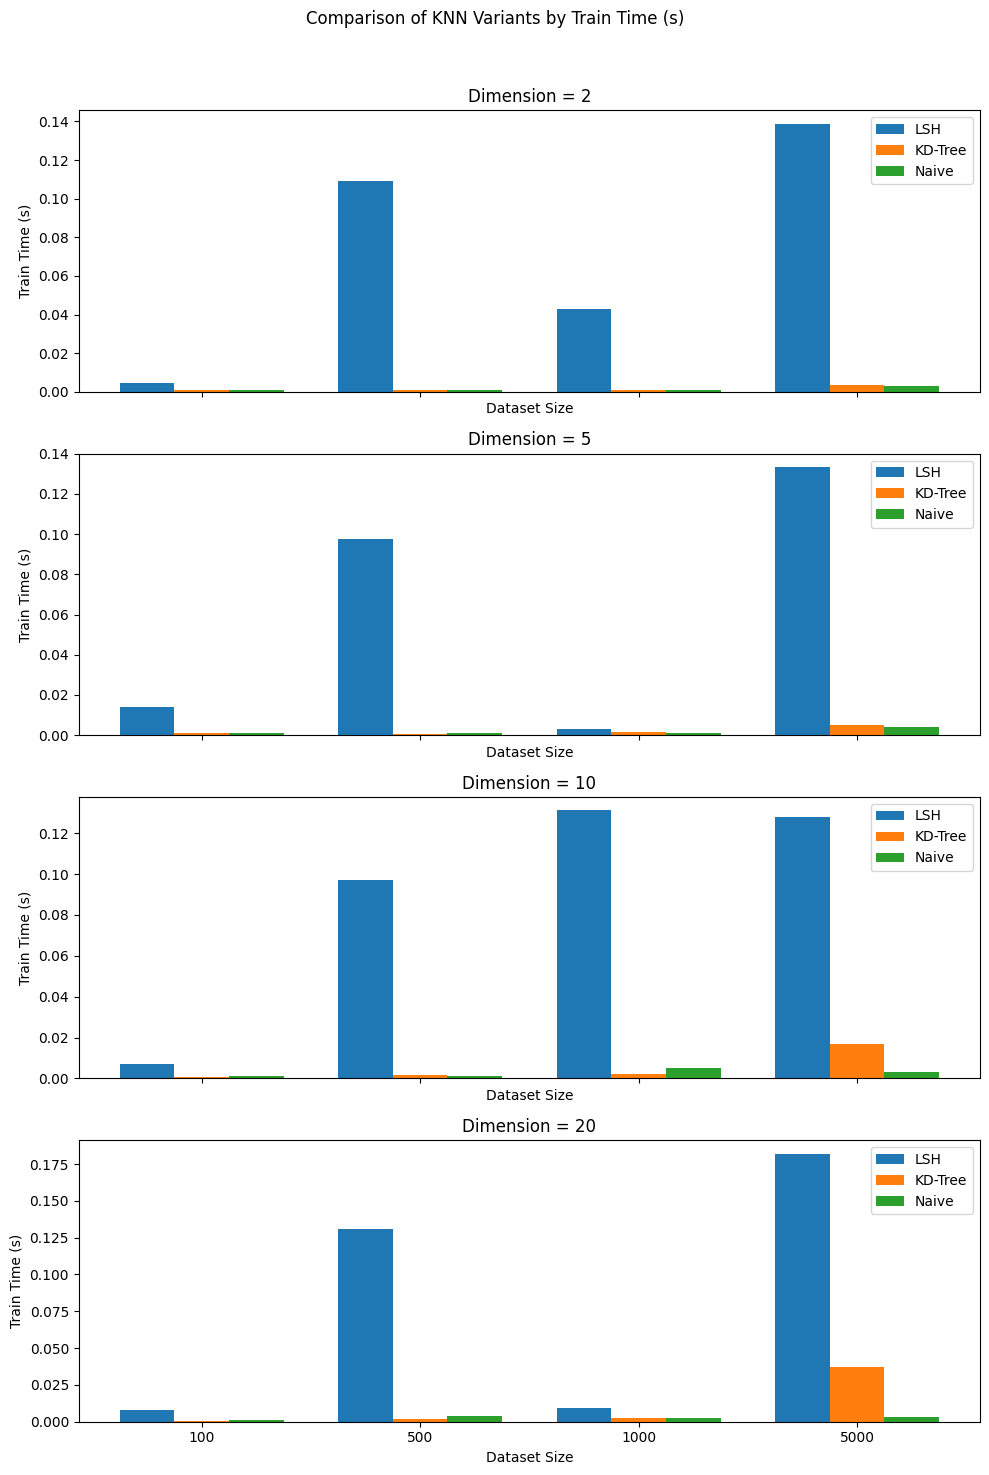

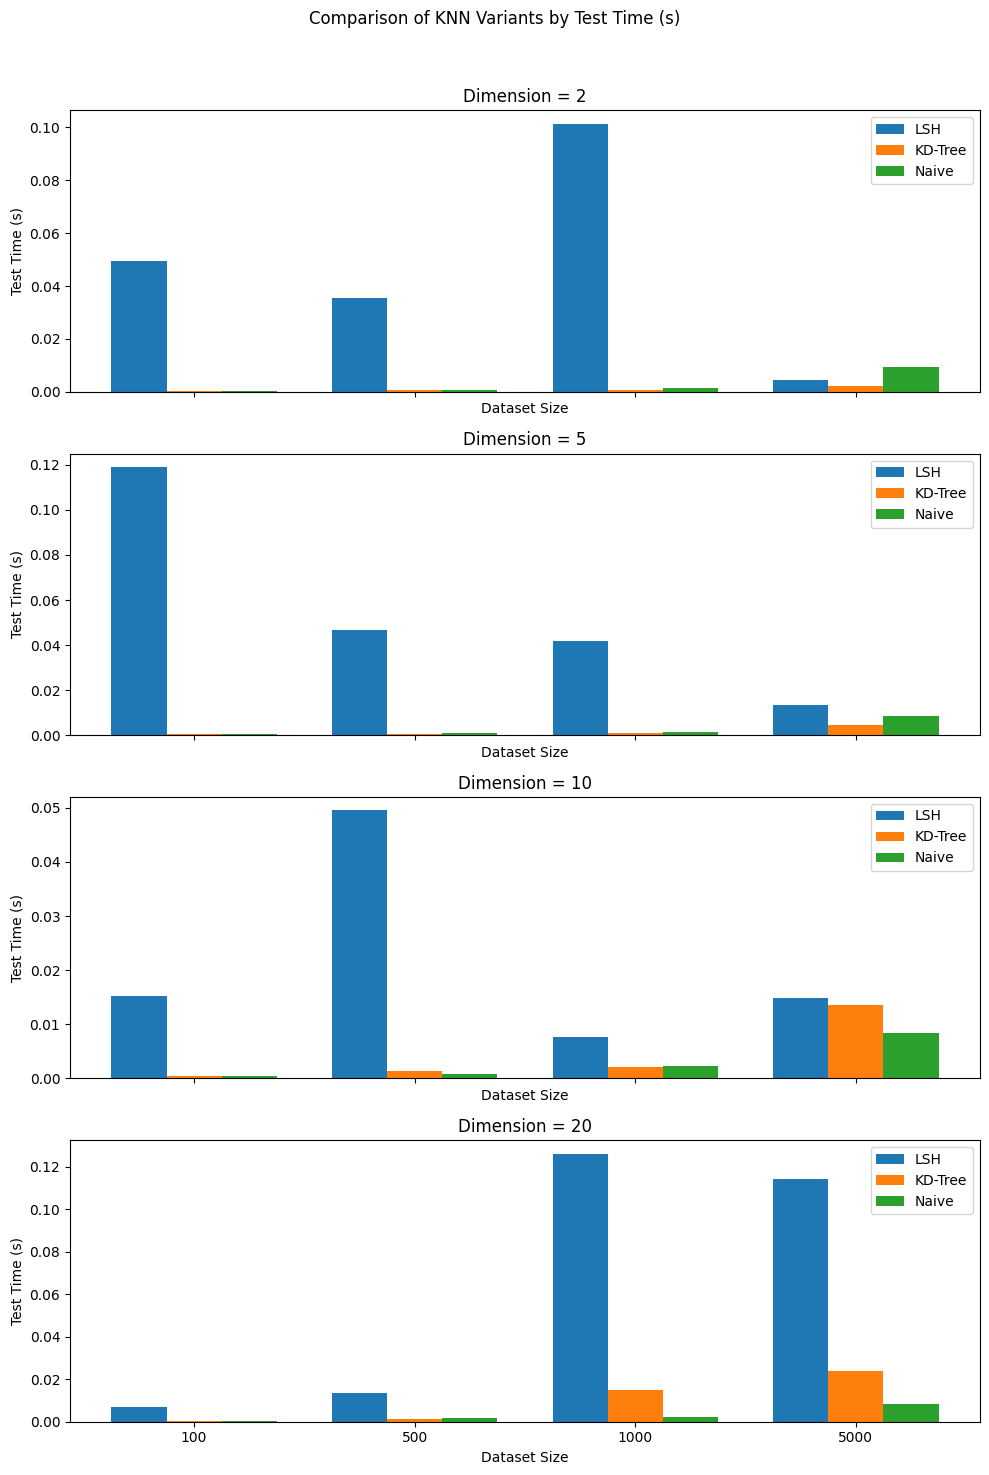

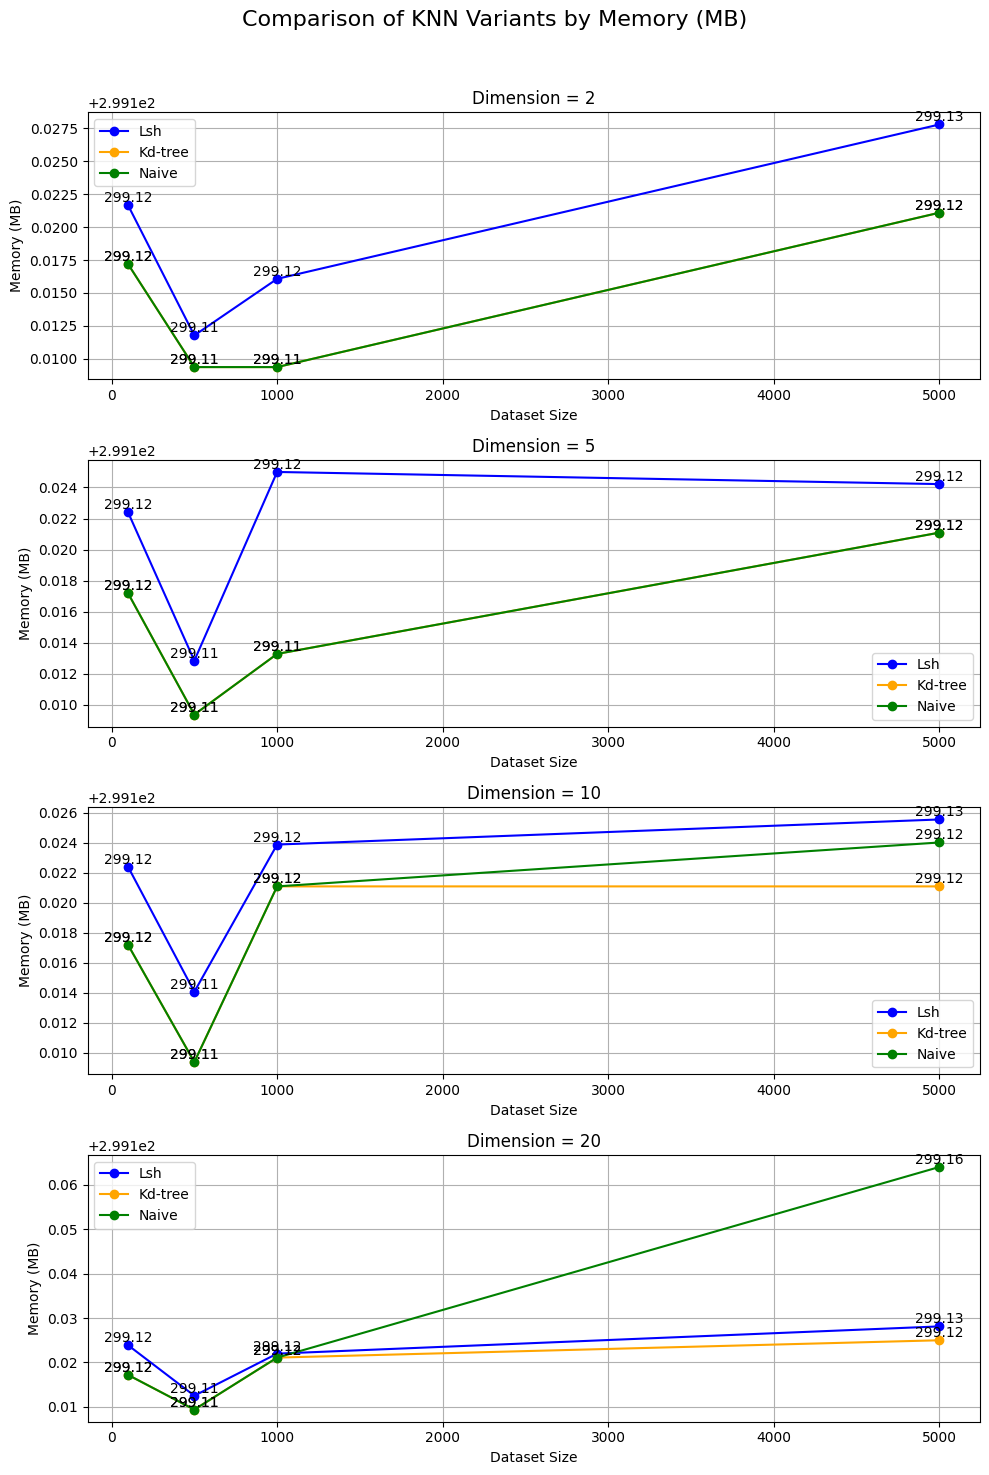

In [3]:
import numpy as np
import time
from memory_profiler import memory_usage
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances

# 1. Implement Approximate KNN using LSH
def approximate_knn(X_train, X_test, K,projections=5):
    np.random.seed(0)
    R = np.random.randn(X_train.shape[1], projections)
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Performance Evaluation with Training and Testing Time
def evaluate_knn_variants():
    results = []
    dataset_sizes = [100, 500, 1000, 5000]
    dimensions = [2, 5, 10, 20]
    K = 5

    for N in dataset_sizes:
        for D in dimensions:
            X_train = np.random.rand(N, D)
            X_test = np.random.rand(10, D)

            for method, func in [('LSH', approximate_knn),
                                 ('KD-Tree', kd_tree_knn),
                                 ('Naive', naive_knn)]:
                # Training time
                start_train = time.time()
                func(X_train, X_test[:1], K)  # fitting the model for training time estimation
                train_time = time.time() - start_train

                # Testing time (finding neighbors for test set)
                start_test = time.time()
                func(X_train, X_test, K)
                test_time = time.time() - start_test

                # Memory usage
                mem_usage = memory_usage((func, (X_train, X_test, K)))
                avg_mem = np.mean(mem_usage)
                
                results.append({
                    'Method': method,
                    'Dataset Size': N,
                    'Dimensions': D,
                    'Train Time (s)': train_time,
                    'Test Time (s)': test_time,
                    'Memory (MB)': avg_mem
                })

    return pd.DataFrame(results)

# 5. Plotting Function for Comparison
def plot_comparison(df):
    metrics = ['Train Time (s)', 'Test Time (s)']
    dataset_sizes = df['Dataset Size'].unique()
    dimensions = df['Dimensions'].unique()

    for metric in metrics:
        fig, ax = plt.subplots(len(dimensions), 1, figsize=(10, 15), sharex=True)
        fig.suptitle(f'Comparison of KNN Variants by {metric}')

        for idx, D in enumerate(dimensions):
            sub_df = df[df['Dimensions'] == D]
            bar_width = 0.25
            x = np.arange(len(dataset_sizes))

            for i, method in enumerate(['LSH', 'KD-Tree', 'Naive']):
                values = sub_df[sub_df['Method'] == method][metric]
                ax[idx].bar(x + i * bar_width, values, width=bar_width, label=method)

            ax[idx].set_title(f'Dimension = {D}')
            ax[idx].set_xticks(x + bar_width)
            ax[idx].set_xticklabels(dataset_sizes)
            ax[idx].set_xlabel('Dataset Size')
            ax[idx].set_ylabel(metric)
            ax[idx].legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
        plt.show()
        
# Plot memory results
def plot_memory_comparison(memory_results, dimensions, dataset_sizes):
    fig, axes = plt.subplots(len(dimensions), 1, figsize=(10, 15))
    fig.suptitle("Comparison of KNN Variants by Memory (MB)", fontsize=16)
    colors = ['blue', 'orange', 'green']
    
    for i, dim in enumerate(dimensions):
        ax = axes[i]
        ax.set_title(f"Dimension = {dim}")
        ax.set_xlabel("Dataset Size")
        ax.set_ylabel("Memory (MB)")
        
        for j, method in enumerate(["LSH", "KD-Tree", "Naive"]):
            # Access memory results for the specific dimension and method using multi-level indexing
            ax.plot(dataset_sizes, memory_results.loc[dim, method], label=method.capitalize(), color=colors[j], marker='o')
            for k, value in enumerate(memory_results.loc[dim, method]):
                ax.text(dataset_sizes[k], value, f"{value:.2f}", ha='center', va='bottom')
        
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

        

# Main Execution
if __name__ == "__main__":
    # Part 1: Run Performance Evaluation and Display Results
    df_results = evaluate_knn_variants()
    print(df_results)

    # Part 2: Plot Comparison of Train Time, Test Time, and Memory Usage
    plot_comparison(df_results)

    # Group memory results by Dimensions and Dataset Size for easy plotting
    memory_results = df_results.groupby(['Dimensions', 'Dataset Size', 'Method'])['Memory (MB)'].mean().unstack(level=2)
    plot_memory_comparison(memory_results, df_results['Dimensions'].unique(), df_results['Dataset Size'].unique())




**ideal trends:**

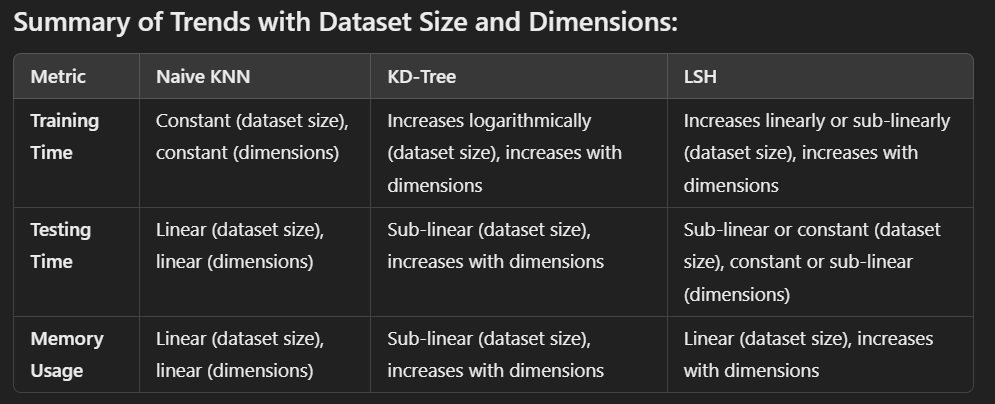

**for training time:**

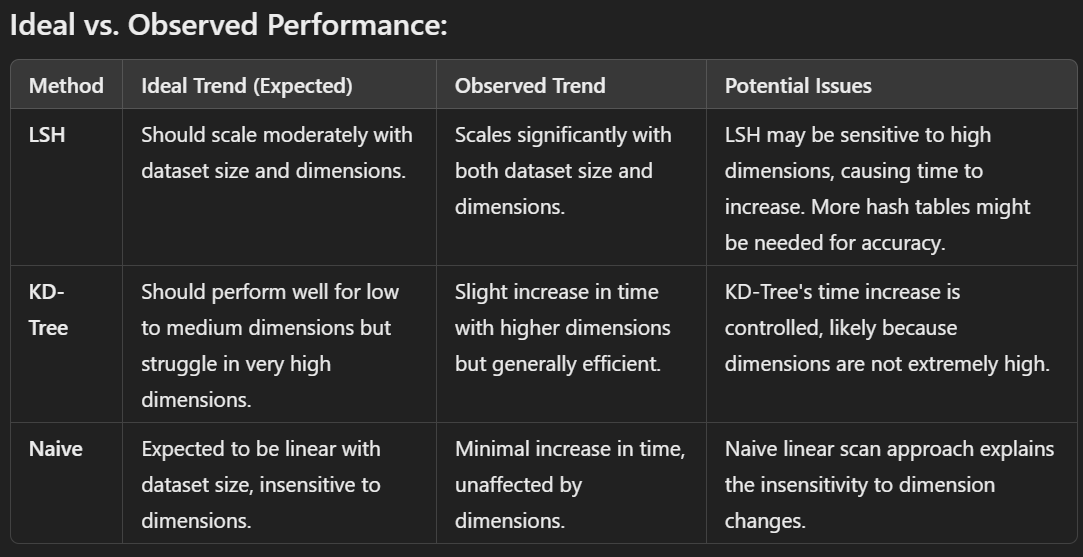

**for test time:**

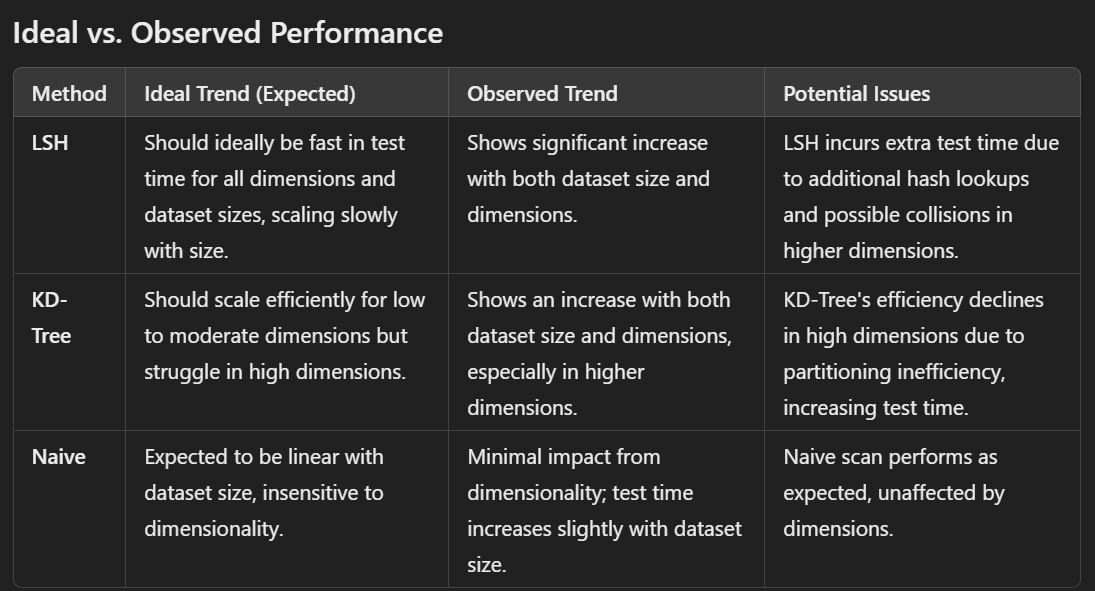

**for memory usage:**

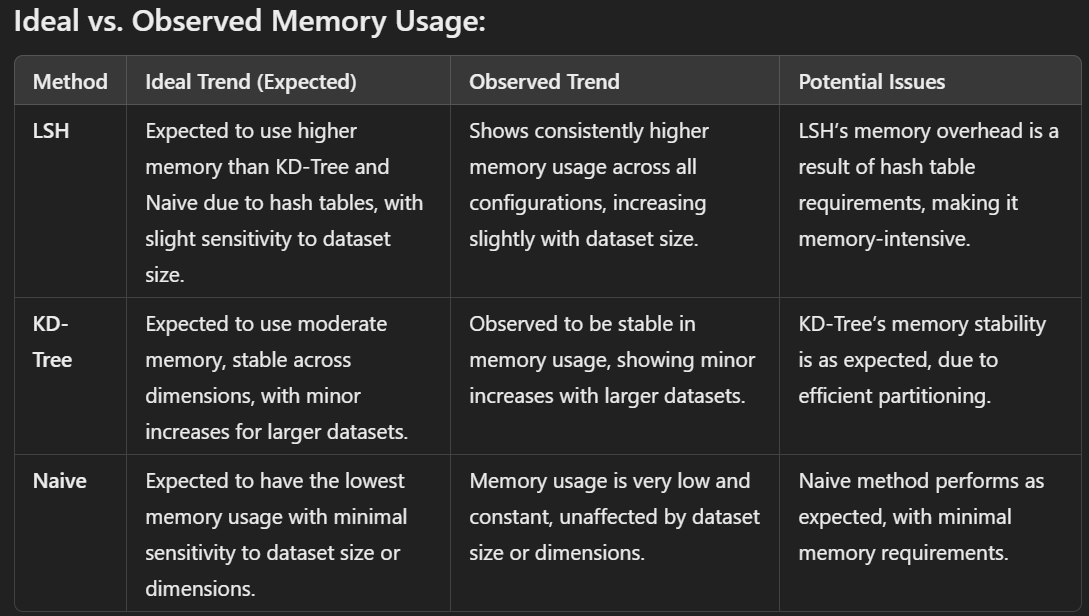

# Q2, part2
**Visualising missed neighbours because of approximations along with partitioning**

**Here is the part without visualising the partitions:**

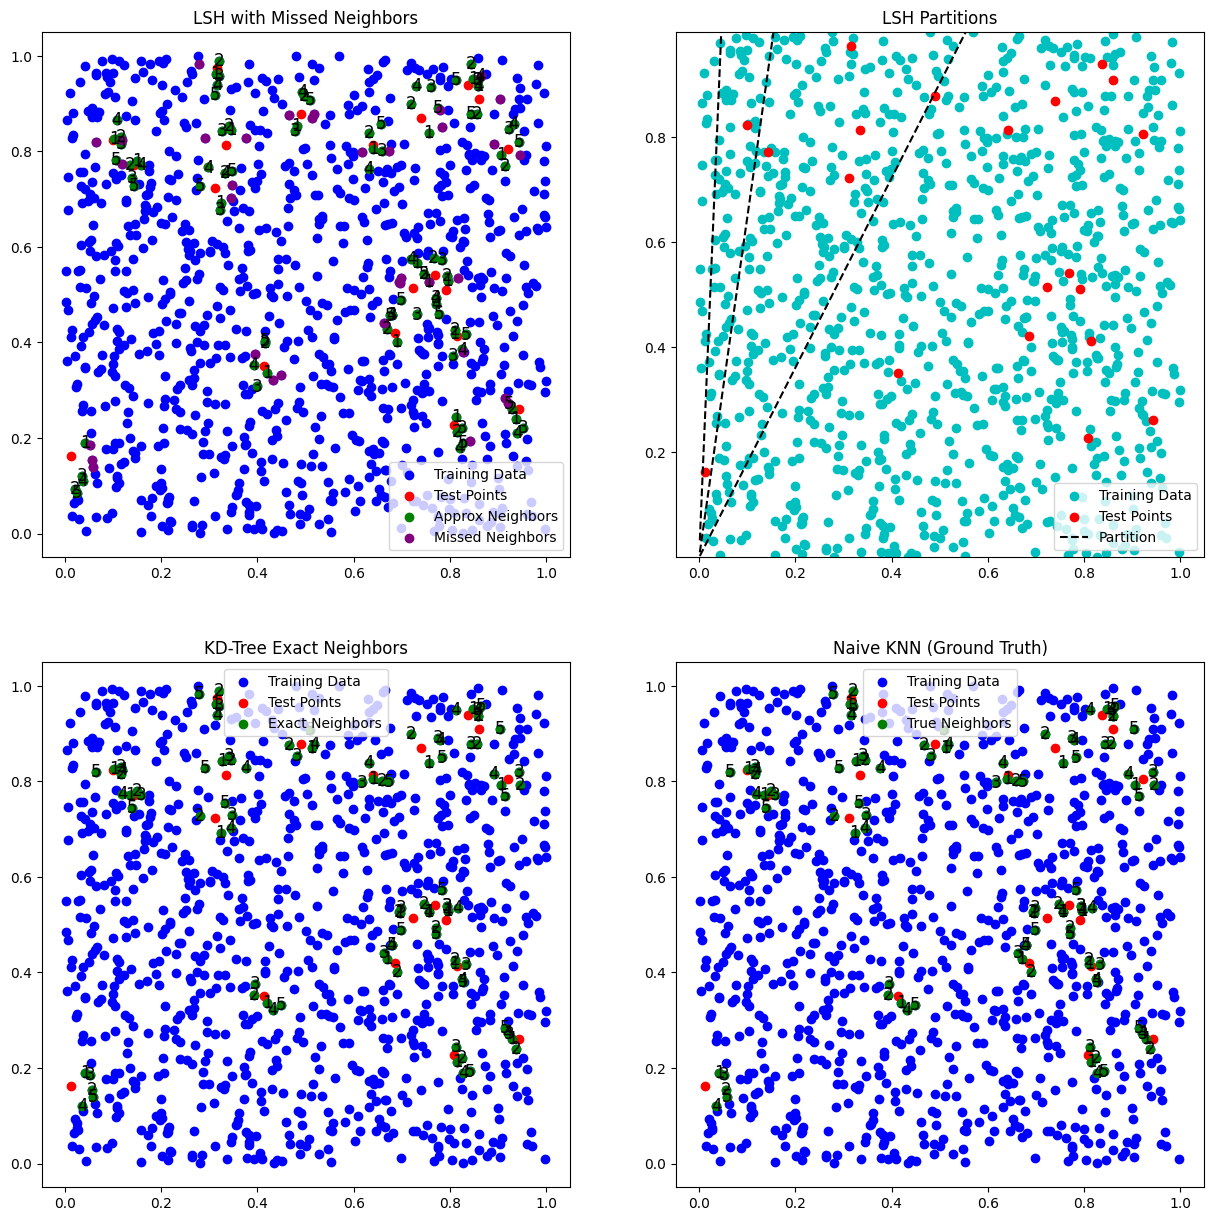

Total Missed Neighbors by Approximate KNN: 37


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances
np.random.seed(20)

# 1. Implement Approximate KNN using LSH
def approximate_knn(X_train, X_test, K, projections=5):
    np.random.seed(0)
    R = np.random.randn(X_train.shape[1], projections)  # LSH random projection matrix
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances, R  # Return R as the LSH partition matrix

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K, W):
    indices_approx, _, _ = approximate_knn(X_train, X_test, K)  # Approximate KNN (LSH)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)  # Exact KNN (KD-tree)
    indices_naive, _ = naive_knn(X_train, X_test, K)  # Exact KNN (Naive)

    plt.figure(figsize=(15, 15))

    missed_neighbors_count = 0

    # Plotting Approximate KNN Results with Missed Neighbors Highlighted
    plt.subplot(2, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
        missed_neighbors_count += len(missed_neighbors)
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("LSH with Missed Neighbors")
    plt.legend()

    # Plotting LSH Partitions
    plt.subplot(2, 2, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='c', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")

    # Add LSH partitions as lines
    x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 500)
    for i in range(W.shape[1]):  # Iterate over the number of projections
        slope = -W[0, i] / W[1, i]  # Fixed slope calculation for 2D data
        intercept = 0  # The LSH hyperplanes pass through the origin
        y_range = slope * x_range + intercept
        plt.plot(x_range, y_range, linestyle="--", color="black", label="Partition" if i == 0 else "")

    plt.title("LSH Partitions")
    plt.ylim(X_train[:, 1].min(), X_train[:, 1].max())
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(2, 2, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting Naive KNN Results (Ground Truth)
    plt.subplot(2, 2, 4)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()
    print(f"Total Missed Neighbors by Approximate KNN: {missed_neighbors_count}")
    
# Main Execution
if __name__ == "__main__":
    X_train = np.random.rand(1000, 2)  # Training data in 2D
    X_test = np.random.rand(20, 2)    # Test data in 2D
    K = 5

    # Get LSH partition matrix
    _, _, W = approximate_knn(X_train, X_test, K)

    # Visualize KNN and LSH Partitions
    visualize_knn_2d(X_train, X_test, K, W)


**Here is the one with partitioning included as Voronoi boundaries, but separately:**

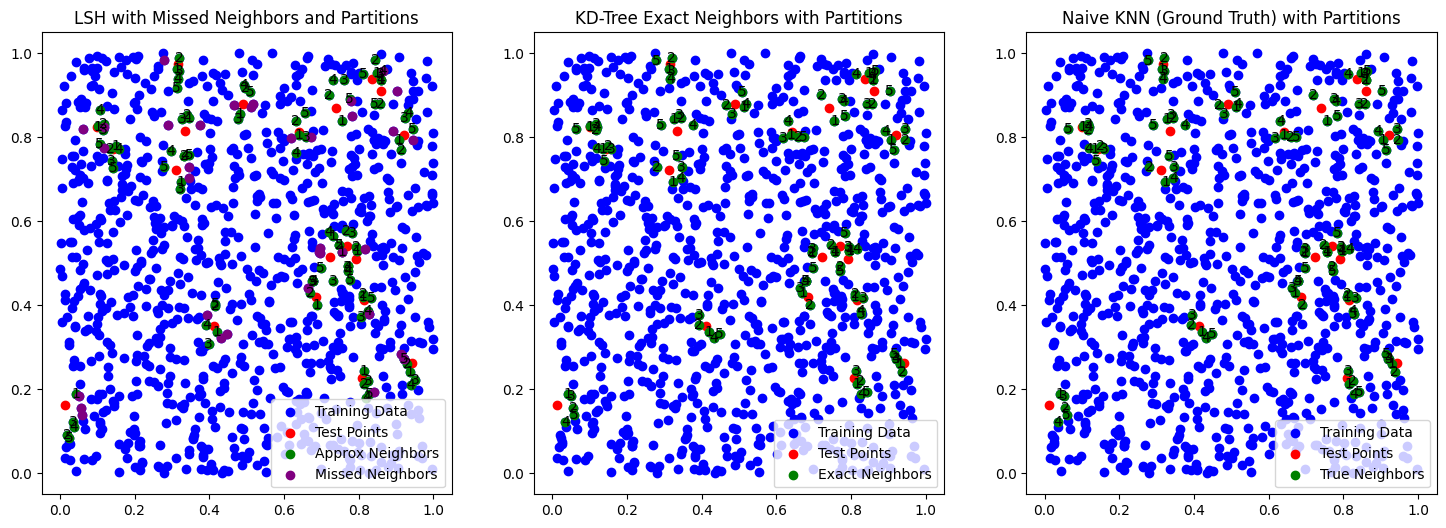

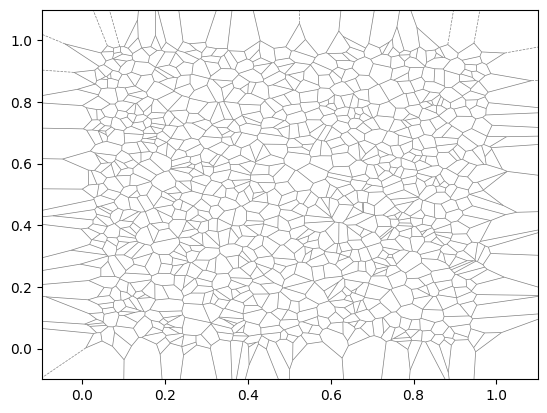

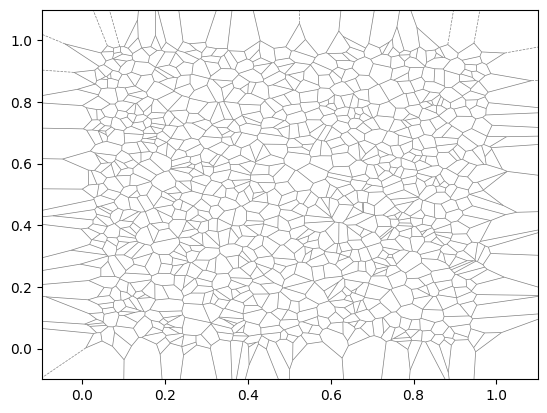

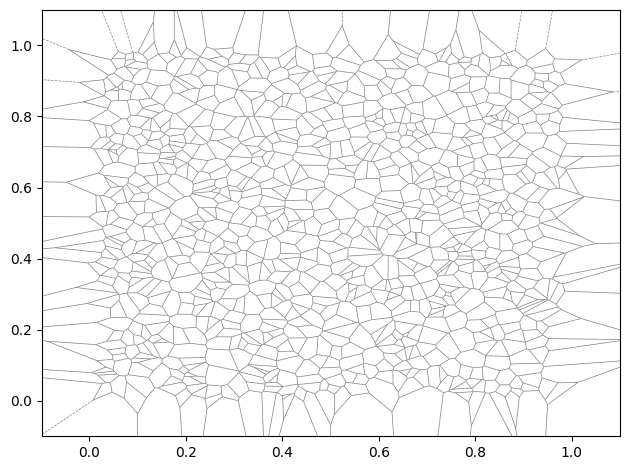

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances
from scipy.spatial import Voronoi, voronoi_plot_2d
np.random.seed(20)

# 1. Implement Approximate KNN using LSH
def approximate_knn(X_train, X_test, K, projections=5):
    np.random.seed(0)
    R = np.random.randn(X_train.shape[1], projections)
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances

# 2. Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# Function to add Voronoi partitions to plots
def plot_voronoi_partitions(X_train):
    vor = Voronoi(X_train)
    voronoi_plot_2d(vor, show_vertices=False, line_colors='gray', line_width=0.5, show_points=False)

# 6. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K):
    indices_approx, _ = approximate_knn(X_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plotting Approximate KNN Results with Missed Neighbors Highlighted
    axs[0].set_title("LSH with Missed Neighbors and Partitions")
    plot_voronoi_partitions(X_train)

    axs[0].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    axs[0].scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        axs[0].scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            axs[0].scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            axs[0].text(neighbor[0], neighbor[1], f"{i+1}", fontsize=10, color='black', ha='center', va='center')

    axs[0].legend()

    # Plotting KD-Tree Results
    axs[1].set_title("KD-Tree Exact Neighbors with Partitions")
    plot_voronoi_partitions(X_train)
    axs[1].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    axs[1].scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        axs[1].scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            axs[1].text(neighbor[0], neighbor[1], f"{i+1}", fontsize=10, color='black', ha='center', va='center')

    axs[1].legend()

    # Plotting Naive KNN Results (Ground Truth)
    axs[2].set_title("Naive KNN (Ground Truth) with Partitions")
    plot_voronoi_partitions(X_train)
    axs[2].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    axs[2].scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        axs[2].scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            axs[2].text(neighbor[0], neighbor[1], f"{i+1}", fontsize=10, color='black', ha='center', va='center')

    axs[2].legend()

    plt.tight_layout()
    plt.show()


# Main Execution
if __name__ == "__main__":
    # Part 3: Visualization of Neighbors in 2D
    X_train = np.random.rand(1000, 2)  # Training data in 2D
    X_test = np.random.rand(20, 2)    # Test data in 2D
    K = 5
    visualize_knn_2d(X_train, X_test, K)


**Here is the one that combines both:**

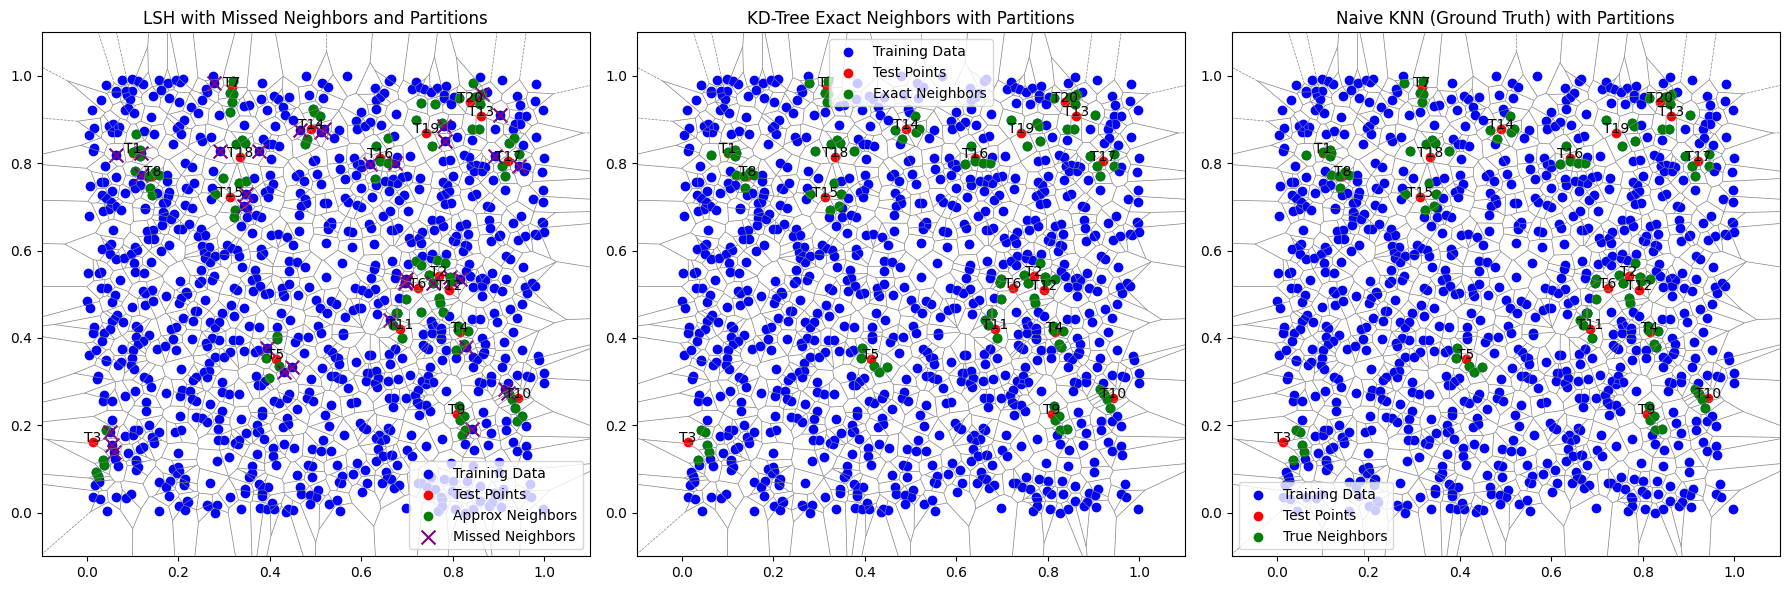

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from sklearn.metrics import pairwise_distances
from scipy.spatial import Voronoi, voronoi_plot_2d
np.random.seed(20)

# Implement Approximate KNN using LSH
def approximate_knn(X_train, X_test, K, projections=5):
    np.random.seed(0)
    R = np.random.randn(X_train.shape[1], projections)
    X_train_proj = X_train @ R
    X_test_proj = X_test @ R
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    return indices, distances

# Implement KD-tree KNN
def kd_tree_knn(X_train, X_test, K):
    kd_tree = KDTree(X_train, leaf_size=30)
    distances, indices = kd_tree.query(X_test, k=K)
    return indices, distances

# Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# Function to plot Voronoi partitions
def plot_voronoi_partitions(X_train, ax):
    vor = Voronoi(X_train)
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray', line_width=0.5, show_points=False)

# Visualization of Missed Neighbors and Partitions in 2D Space with Labels
def visualize_knn_2d(X_train, X_test, K):
    indices_approx, _ = approximate_knn(X_train, X_test, K)
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # LSH with Missed Neighbors and Partitions
    axs[0].set_title("LSH with Missed Neighbors and Partitions")
    plot_voronoi_partitions(X_train, axs[0])
    axs[0].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    axs[0].scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")

    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        axs[0].scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")

        # Missed Neighbors
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            axs[0].scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', marker='x', s=100, label="Missed Neighbors" if idx == 0 else "")
        
        # Label the test points
        axs[0].text(test_pt[0], test_pt[1], f'T{idx+1}', color='black', ha='center', fontsize=10)

    axs[0].legend()

    # KD-Tree with Partitions
    axs[1].set_title("KD-Tree Exact Neighbors with Partitions")
    plot_voronoi_partitions(X_train, axs[1])
    axs[1].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    axs[1].scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")

    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        axs[1].scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
        axs[1].text(test_pt[0], test_pt[1], f'T{idx+1}', color='black', ha='center', fontsize=10)

    axs[1].legend()

    # Naive KNN (Ground Truth) with Partitions
    axs[2].set_title("Naive KNN (Ground Truth) with Partitions")
    plot_voronoi_partitions(X_train, axs[2])
    axs[2].scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    axs[2].scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")

    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        axs[2].scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
        axs[2].text(test_pt[0], test_pt[1], f'T{idx+1}', color='black', ha='center', fontsize=10)

    axs[2].legend()

    plt.tight_layout()
    plt.show()

# Main Execution
if __name__ == "__main__":
    X_train = np.random.rand(1000, 2)  # Reduced data size for better visual clarity
    X_test = np.random.rand(20, 2)    # Fewer test points for simpler visualization
    K = 5
    visualize_knn_2d(X_train, X_test, K)


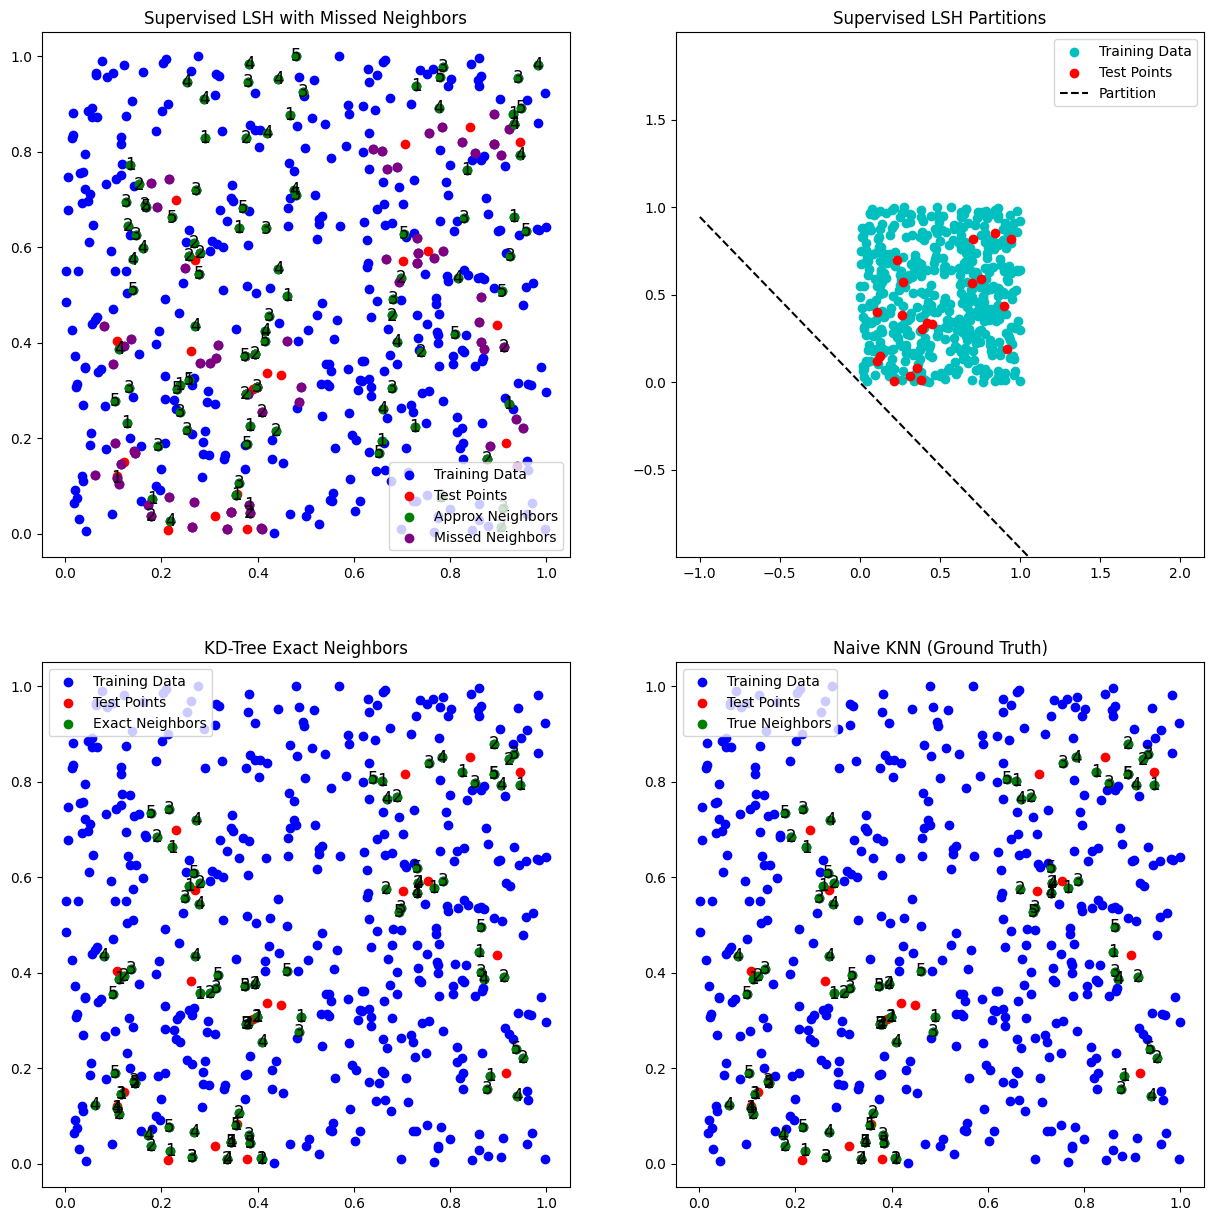

Total Missed Neighbors by Approximate KNN: 89


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import BallTree
from sklearn.metrics import pairwise_distances
np.random.seed(20)

# 1. Implement Approximate KNN using Supervised LSH (learned hyperplanes via SVM)
def supervised_lsh(X_train, X_test, K):
    # Train an SVM to create hyperplanes
    svc = SVC(kernel='linear')  # Linear kernel for hyperplane creation
    svc.fit(X_train, np.random.randint(0, 2, X_train.shape[0]))  # Random binary labels for simplicity
    
    # Get the learned hyperplanes (coefficients of the SVM decision boundary)
    hyperplanes = svc.coef_.T  # Shape (features, n_hyperplanes)
    
    # Now project the data onto these hyperplanes
    X_train_proj = X_train @ hyperplanes
    X_test_proj = X_test @ hyperplanes
    
    # Perform nearest neighbor search on the projections
    nn = NearestNeighbors(n_neighbors=K, algorithm='brute').fit(X_train_proj)
    distances, indices = nn.kneighbors(X_test_proj)
    
    return indices, distances, hyperplanes  # Return the learned hyperplanes

# 2. Implement KD-tree KNN using BallTree
def kd_tree_knn(X_train, X_test, K):
    ball_tree = BallTree(X_train)  # Using BallTree instead of KDTree
    distances, indices = ball_tree.query(X_test, k=K)
    return indices, distances

# 3. Implement Naive KNN
def naive_knn(X_train, X_test, K):
    distances = pairwise_distances(X_test, X_train)
    indices = np.argsort(distances, axis=1)[:, :K]
    k_distances = np.take_along_axis(distances, indices, axis=1)
    return indices, k_distances

# 4. Visualization of Missed Neighbors and Partitions in 2D Space
def visualize_knn_2d(X_train, X_test, K, hyperplanes):
    indices_approx, _, _ = supervised_lsh(X_train, X_test, K)  # Unpack the first two outputs
    indices_kd, _ = kd_tree_knn(X_train, X_test, K)
    indices_naive, _ = naive_knn(X_train, X_test, K)

    plt.figure(figsize=(15, 15))

    missed_neighbors_count = 0

    # Plotting Approximate KNN Results with Missed Neighbors Highlighted
    plt.subplot(2, 2, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_approx[idx]]
        true_neighbors = X_train[indices_naive[idx]]
        
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Approx Neighbors" if idx == 0 else "")
        
        missed_neighbors = [point for point in true_neighbors if point.tolist() not in neighbors.tolist()]
        if missed_neighbors:
            missed_neighbors = np.array(missed_neighbors)
            plt.scatter(missed_neighbors[:, 0], missed_neighbors[:, 1], color='purple', label="Missed Neighbors" if idx == 0 else "")
        missed_neighbors_count += len(missed_neighbors)
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Supervised LSH with Missed Neighbors")
    plt.legend()

    # Plotting LSH Partitions
    plt.subplot(2, 2, 2)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='c', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")

    # Add LSH partitions as lines based on learned hyperplanes
    x_range = np.linspace(X_train[:, 0].min()-1, X_train[:, 0].max()+1, 500)
    for i in range(hyperplanes.shape[1]):
        slope = -hyperplanes[0, i] / hyperplanes[1, i]  # Fixed slope calculation for 2D data
        intercept = 0  # The LSH hyperplanes pass through the origin
        y_range = slope * x_range + intercept
        plt.plot(x_range, y_range, linestyle="--", color="black", label="Partition" if i == 0 else "")

    plt.title("Supervised LSH Partitions")
    plt.ylim(X_train[:, 1].min()-1, X_train[:, 1].max()+1)
    plt.legend()

    # Plotting KD-Tree Results
    plt.subplot(2, 2, 3)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_kd[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="Exact Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("KD-Tree Exact Neighbors")
    plt.legend()

    # Plotting Naive KNN Results (Ground Truth)
    plt.subplot(2, 2, 4)
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label="Training Data")
    plt.scatter(X_test[:, 0], X_test[:, 1], color='red', label="Test Points")
    
    for idx, test_pt in enumerate(X_test):
        neighbors = X_train[indices_naive[idx]]
        plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label="True Neighbors" if idx == 0 else "")
        
        # Label each of the nearest neighbors for the current test point
        for i, neighbor in enumerate(neighbors):
            plt.text(neighbor[0], neighbor[1], f"{i+1}", fontsize=12, color='black', ha='center', va='center')

    plt.title("Naive KNN (Ground Truth)")
    plt.legend()

    plt.show()
    print(f"Total Missed Neighbors by Approximate KNN: {missed_neighbors_count}")
    
# Main Execution
if __name__ == "__main__":
    X_train = np.random.rand(500, 2)  # Training data in 2D
    X_test = np.random.rand(20, 2)    # Test data in 2D
    K = 5

    # Get LSH partition matrix (hyperplanes)
    _, _, hyperplanes = supervised_lsh(X_train, X_test, K)

    # Visualize KNN and LSH Partitions
    visualize_knn_2d(X_train, X_test, K, hyperplanes)
